In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
from functools import reduce
import json
from dsb2019.visualization import session_browser
from tqdm import tqdm
import plotly.graph_objects as go
from IPython.display import display, Markdown
from plotly.offline import plot, iplot
import plotly
plotly.offline.init_notebook_mode(connected=True) 

In [3]:
sample_submission=pd.read_csv("../data/raw/sample_submission.csv")
specs=pd.read_csv("../data/raw/specs.csv")
test=pd.read_csv("../data/raw/test.csv")
train=pd.read_csv("../data/raw/train.csv")
train_labels=pd.read_csv("../data/raw/train_labels.csv")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

parsing timezone aware datetimes is deprecated; this will raise an error in the future



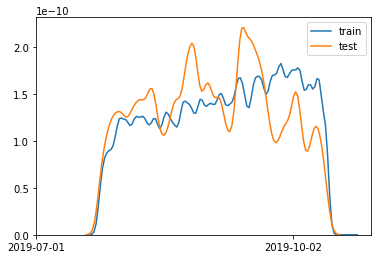

In [4]:
def plot_times(df, label):
    ax =sns.kdeplot(df.timestamp.values.astype('datetime64[ms]'), label=label)
    x_ticks = ax.get_xticks()
    ax.set_xticks(x_ticks[::2])
    xlabels = [pd.Timestamp(x, unit='ms').date() for x in x_ticks[::2]]
    ax.set_xticklabels(xlabels)
plot_times(train, "train")
plot_times(test, "test")

Split by installation_id should be fine.

Why test and train have different cycles however?

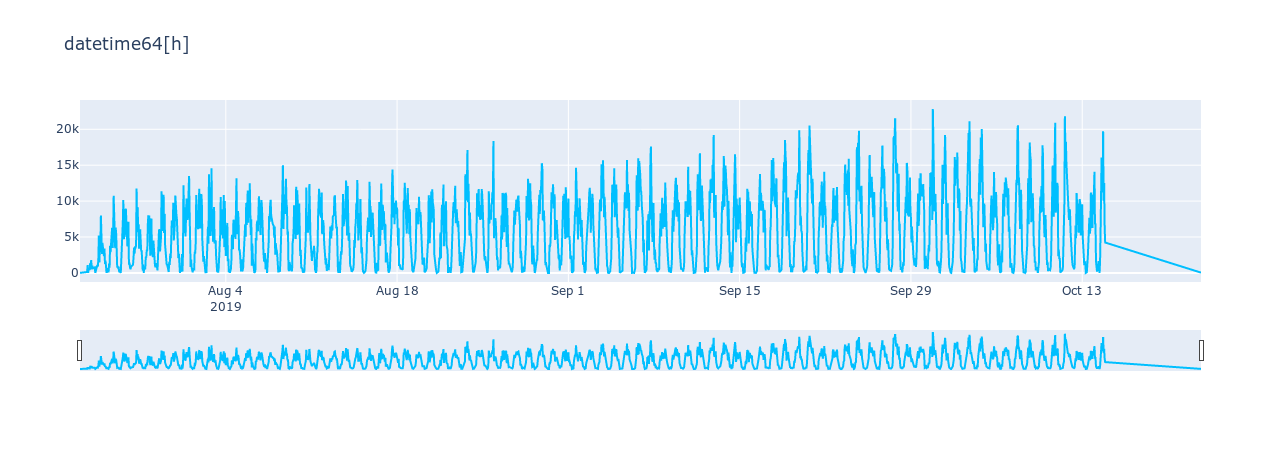

In [5]:
def plot_hourly_counts(df, resolution="datetime64[h]"):
    df["time"]= df.timestamp.astype(resolution)
    timeseries = df.groupby("time").timestamp.count().reset_index()
    timeseries.columns = ["time", "cnt"]
    timeseries.sort_values("time", inplace=True)
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=timeseries.time, y=timeseries.cnt,
                             line_color='deepskyblue'))
    fig.update_layout(title_text=resolution, xaxis_rangeslider_visible=True)
    return fig

plotly.offline.iplot(plot_hourly_counts(train))

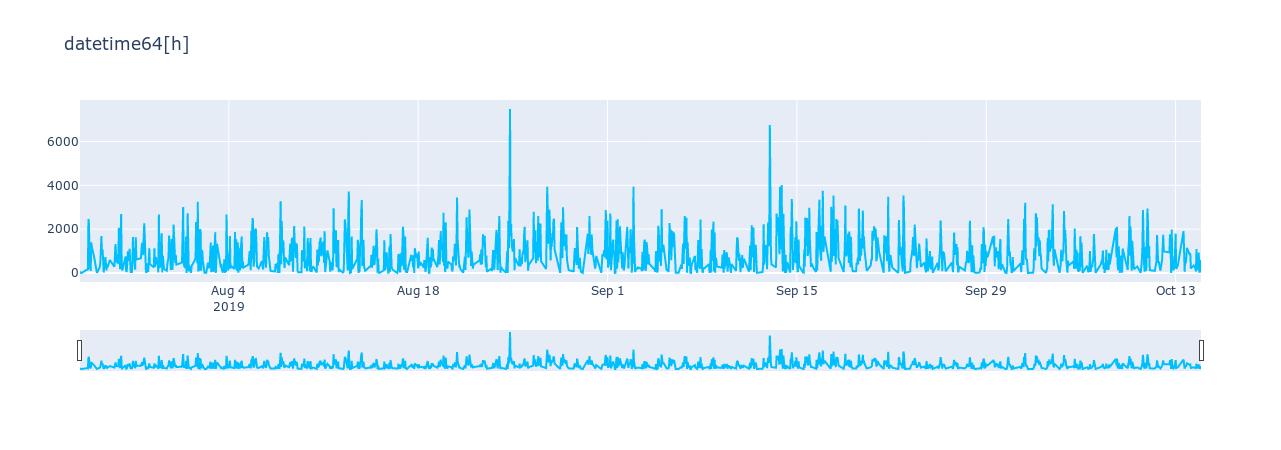

In [6]:
plot_hourly_counts(test)

In [7]:
test[test.timestamp.str.startswith("2019-09-13T00")].groupby("installation_id").installation_id.count()

installation_id
59e24114       2
e6862711    6280
fe8984b5     468
Name: installation_id, dtype: int64

### Got anomalous installation in test: e6862711

In [8]:
test[test.timestamp.str.startswith("2019-08-24T19")].groupby("installation_id").installation_id.count()

installation_id
6c8222a7      19
7dd852d8    2372
8cd5bc7c    1811
91d4699e     477
9cfde2cc     791
a788da19       5
ce08e98b     630
d09ebf52     475
f86a6ed4     899
Name: installation_id, dtype: int64

In [9]:
test.groupby("installation_id").installation_id.count().describe()

count     1000.000000
mean      1156.414000
std       1884.912755
min          1.000000
25%        196.000000
50%        524.000000
75%       1390.250000
max      21237.000000
Name: installation_id, dtype: float64

In [10]:
session_browser.show_player_sessions(test, "e6862711")

__8b3f7a7fea13be1d Welcome to Lost Lagoon! Clip NONE v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:02:34        2000 2019-09-13

__d9ea8e89a24f83d6 Magma Peak - Level 1 Clip MAGMAPEAK v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:02:59        2000 2019-09-13

__ed41e4dd1fe6eba8 Sandcastle Builder (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            77261ab5  2019-09-13T00:03:29        2000 2019-09-13   
2            1325467d  2019-09-13T00:03:30        4070 2019-09-13   
3            1325467d  2019-09-13T00:03:30        4070 2019-09-13   
4            1325467d  2019-09-13T00:03:30        4070 2019-09-13   
5            b2dba42b  2019-09-13T00:03:30        3010 2019-09-13   
6            1325467d  2019-09-13T00:03:30        4070 2019-09-13   
7            1325467d  2019-09-13T00:03:30        4070 2019-09-13   
8            1325467d  2019-09-13T00:03:30        4070 2019-09-13   
9            1325467d  2019-09-13T00:03:30        4070 2019-09-13   
10           1325467d  2019-09-13T00:03:30        4070 2019-09-13   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2            {'x': 565, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
3            {'x': 565, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
4            {'x': 565, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
5                                                                         -   
6            {'x': 563, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
7            {'x': 563, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
8            {'x': 564, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
9            {'x': 563, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
10           {'x': 564, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   

                                                                                                                               description  \
event_count                                                                                                                                  
1                                                                                                                                        -   
2                                                                                                                                        -   
3                                                                                                                                        -   
4                                                                                                                                        -   
5            Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!   
6                                                                                                                                        -   
7                                                                                                                                        -   
8                                                                                                                                        -   
9                                                                                                                                        -   
10                                                                                                                                       -   

                                                identifier media_type  \
event_count                                                             
1                                                        -          -   
2                                                        -          -   
3                                                        -          -   
4                                                        -          -   
5            Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape      audio   
6                  

__809b3cec81b3051f Sandcastle Builder (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            77261ab5  2019-09-13T00:09:33        2000 2019-09-13   
2            1325467d  2019-09-13T00:09:33        4070 2019-09-13   
3            1325467d  2019-09-13T00:09:33        4070 2019-09-13   
4            b2dba42b  2019-09-13T00:09:33        3010 2019-09-13   
5            1325467d  2019-09-13T00:09:33        4070 2019-09-13   
6            1325467d  2019-09-13T00:09:33        4070 2019-09-13   
7            1325467d  2019-09-13T00:09:33        4070 2019-09-13   
8            1325467d  2019-09-13T00:09:33        4070 2019-09-13   
9            1325467d  2019-09-13T00:09:33        4070 2019-09-13   
10           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
11           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
12           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
13           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
14           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
15           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
16           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
17           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
18           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
19           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
20           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
21           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
22           1325467d  2019-09-13T00:09:34        4070 2019-09-13   
23           1325467d  2019-09-13T00:09:34        4070 2019-09-13   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2            {'x': 794, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
3            {'x': 321, 'y': 256, 'stage_width': 1015, 'stage_height': 762}   
4                                                                         -   
5            {'x': 322, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
6            {'x': 709, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
7            {'x': 648, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
8            {'x': 710, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
9            {'x': 710, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
10           {'x': 710, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
11           {'x': 710, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
12           {'x': 322, 'y': 256, 'stage_width': 1015, 'stage_height': 762}   
13           {'x': 321, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
14           {'x': 322, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
15           {'x': 323, 'y': 256, 'stage_width': 1015, 'stage_height': 762}   
16           {'x': 321, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
17           {'x': 322, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
18           {'x': 321, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
19           {'x': 613, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
20           {'x': 322, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
21           {'x': 322, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
22           {'x': 323, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
23           {'x': 322, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   

                                                                                                                               description  \
event_count                                                                                                                                  
1                          

__b246933e8ac6a4aa Sandcastle Builder (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            77261ab5  2019-09-13T00:10:33        2000 2019-09-13   
2            b2dba42b  2019-09-13T00:10:33        3010 2019-09-13   
3            1325467d  2019-09-13T00:10:33        4070 2019-09-13   
4            1325467d  2019-09-13T00:10:34        4070 2019-09-13   
5            1325467d  2019-09-13T00:10:34        4070 2019-09-13   
...               ...                  ...         ...        ...   
4452         1325467d  2019-09-13T00:12:53        4070 2019-09-13   
4453         1325467d  2019-09-13T00:12:53        4070 2019-09-13   
4454         1325467d  2019-09-13T00:12:53        4070 2019-09-13   
4455         1325467d  2019-09-13T00:12:53        4070 2019-09-13   
4456         1325467d  2019-09-13T00:12:53        4070 2019-09-13   

            castles_placed  \
event_count                  
1                        -   
2                        -   
3                        -   
4                        -   
5                        -   
...                    ...   
4452                     -   
4453                     -   
4454                     -   
4455                     -   
4456                     -   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2                                                                         -   
3            {'x': 800, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
4            {'x': 710, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
5            {'x': 710, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
...                                                                     ...   
4452         {'x': 885, 'y': 202, 'stage_width': 1015, 'stage_height': 762}   
4453         {'x': 327, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
4454         {'x': 883, 'y': 202, 'stage_width': 1015, 'stage_height': 762}   
4455         {'x': 880, 'y': 201, 'stage_width': 1015, 'stage_height': 762}   
4456         {'x': 880, 'y': 201, 'stage_width': 1015, 'stage_height': 762}   

                                                                                                                               description  \
event_count                                                                                                                                  
1                                                                                                                                        -   
2            Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!   
3                                                                                                                                        -   
4                                                                                                                                        -   
5                                                                                                                                        -   
...                                                                                                                                    ...   
4452                                                                                                                                     -   
4453                                                                                                                                     -   
4454                                                                                                                                     -   
4455                                                                                                                                  

__3073a053fc6aee2b Slop Problem Clip MAGMAPEAK v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:18:51        2000 2019-09-13

__3bafe8f4546bb602 Scrub-A-Dub Game MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time   animal  \
event_count                                                                  
1            6d90d394  2019-09-13T00:19:58        2000 2019-09-13        -   
2            7040c096  2019-09-13T00:20:00        4010 2019-09-13        -   
3            5a848010  2019-09-13T00:20:02        2080 2019-09-13        -   
4            4a09ace1  2019-09-13T00:20:15        2083 2019-09-13        -   
5            dcaede90  2019-09-13T00:20:18        2040 2019-09-13        -   
6            26fd2d99  2019-09-13T00:20:18        2020 2019-09-13        -   
7            f71c4741  2019-09-13T00:20:18        3010 2019-09-13        -   
8            cf82af56  2019-09-13T00:20:23        4070 2019-09-13        -   
9            f7e47413  2019-09-13T00:20:23        3110 2019-09-13        -   
10           f71c4741  2019-09-13T00:20:23        3010 2019-09-13        -   
11           f7e47413  2019-09-13T00:20:24        3110 2019-09-13        -   
12           5c3d2b2f  2019-09-13T00:20:24        4020 2019-09-13      hog   
13           cf82af56  2019-09-13T00:20:27        4070 2019-09-13        -   
14           d88e8f25  2019-09-13T00:20:27        3020 2019-09-13        -   
15           cf82af56  2019-09-13T00:20:27        4070 2019-09-13        -   
16           ac92046e  2019-09-13T00:20:29        3120 2019-09-13        -   
17           5c3d2b2f  2019-09-13T00:20:29        4020 2019-09-13      hog   
18           cf82af56  2019-09-13T00:20:30        4070 2019-09-13        -   
19           08fd73f3  2019-09-13T00:20:30        2030 2019-09-13        -   
20           26fd2d99  2019-09-13T00:20:30        2020 2019-09-13        -   
21           f71c4741  2019-09-13T00:20:30        3010 2019-09-13        -   
22           f7e47413  2019-09-13T00:20:31        3110 2019-09-13        -   
23           5c3d2b2f  2019-09-13T00:20:31        4020 2019-09-13      pig   
24           73757a5e  2019-09-13T00:20:33        3021 2019-09-13        -   
25           2b9272f4  2019-09-13T00:20:37        3121 2019-09-13        -   
26           08fd73f3  2019-09-13T00:20:37        2030 2019-09-13        -   
27           37c53127  2019-09-13T00:20:37        2050 2019-09-13        -   
28           dcaede90  2019-09-13T00:20:39        2040 2019-09-13        -   
29           26fd2d99  2019-09-13T00:20:39        2020 2019-09-13        -   
30           f71c4741  2019-09-13T00:20:39        3010 2019-09-13        -   
31           cf82af56  2019-09-13T00:20:42        4070 2019-09-13        -   
32           f7e47413  2019-09-13T00:20:43        3110 2019-09-13        -   
33           5c3d2b2f  2019-09-13T00:20:43        4020 2019-09-13      hog   
34           cf82af56  2019-09-13T00:20:43        4070 2019-09-13        -   
35           08fd73f3  2019-09-13T00:20:45        2030 2019-09-13        -   
36           26fd2d99  2019-09-13T00:20:45        2020 2019-09-13        -   
37           f71c4741  2019-09-13T00:20:45        3010 2019-09-13        -   
38           f7e47413  2019-09-13T00:20:45        3110 2019-09-13        -   
39           5c3d2b2f  2019-09-13T00:20:45        4020 2019-09-13      pig   
40           73757a5e  2019-09-13T00:20:47        3021 2019-09-13        -   
41           2b9272f4  2019-09-13T00:20:52        3121 2019-09-13        -   
42           08fd73f3  2019-09-13T00:20:52        2030 2019-09-13        -   
43           37c53127  2019-09-13T00:20:52        2050 2019-09-13        -   
44           dcaede90  2019-09-13T00:20:54        2040 2019-09-13        -   
45           26fd2d99  2019-09-13T00:20:54        2020 2019-09-13        -   
46           f71c4741  2019-09-13T00:20:54        3010 2019-09-13        -   
47           f7e47413  2019-09-13T00:20:59        3110 2019-09-13        -   
48           f71c4741  2019-09-13T00:20:59        3010 2019-09-13        -   
49           f7e47413  2019-09-13T00:21:00        3110 2019-09-13        -   
50           5c3d2b2f  2019-09-13T0

__d00fabb2b8fb19dd Watering Hole (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time   cloud  \
event_count                                                                 
1            e64e2cfd  2019-09-13T00:24:38        2000 2019-09-13       -   
2            49ed92e9  2019-09-13T00:24:39        3010 2019-09-13       -   
3            bd701df8  2019-09-13T00:24:46        3110 2019-09-13       -   
4            49ed92e9  2019-09-13T00:24:51        3010 2019-09-13       -   
5            f50fc6c1  2019-09-13T00:24:51        4021 2019-09-13   right   
6            bd701df8  2019-09-13T00:24:52        3110 2019-09-13       -   
7            49ed92e9  2019-09-13T00:24:52        3010 2019-09-13       -   
8            d2e9262e  2019-09-13T00:24:52        4020 2019-09-13  middle   
9            f50fc6c1  2019-09-13T00:24:52        4021 2019-09-13   right   
10           bd701df8  2019-09-13T00:24:54        3110 2019-09-13       -   
11           d2e9262e  2019-09-13T00:24:56        4020 2019-09-13   right   
12           d2e9262e  2019-09-13T00:25:00        4020 2019-09-13    left   
13           49ed92e9  2019-09-13T00:25:01        3010 2019-09-13       -   
14           bd701df8  2019-09-13T00:25:03        3110 2019-09-13       -   
15           49ed92e9  2019-09-13T00:25:04        3010 2019-09-13       -   
16           2fb91ec1  2019-09-13T00:25:10        4025 2019-09-13  middle   
17           c952eb01  2019-09-13T00:25:10        4070 2019-09-13       -   
18           bd701df8  2019-09-13T00:25:12        3110 2019-09-13       -   
19           a6d66e51  2019-09-13T00:25:12        5000 2019-09-13       -   
20           71e712d8  2019-09-13T00:25:14        5010 2019-09-13       -   
21           2fb91ec1  2019-09-13T00:25:15        4025 2019-09-13   right   
22           c952eb01  2019-09-13T00:25:15        4070 2019-09-13       -   
23           2fb91ec1  2019-09-13T00:25:16        4025 2019-09-13    left   
24           49ed92e9  2019-09-13T00:25:16        3010 2019-09-13       -   
25           a6d66e51  2019-09-13T00:25:17        5000 2019-09-13       -   
26           71e712d8  2019-09-13T00:25:19        5010 2019-09-13       -   
27           bd701df8  2019-09-13T00:25:19        3110 2019-09-13       -   
28           f50fc6c1  2019-09-13T00:25:20        4021 2019-09-13   right   
29           f50fc6c1  2019-09-13T00:25:20        4021 2019-09-13   right   
30           f50fc6c1  2019-09-13T00:25:21        4021 2019-09-13   right   
31           d2e9262e  2019-09-13T00:25:22        4020 2019-09-13  middle   
32           d2e9262e  2019-09-13T00:25:25        4020 2019-09-13   right   
33           2fb91ec1  2019-09-13T00:25:25        4025 2019-09-13   right   
34           c952eb01  2019-09-13T00:25:26        4070 2019-09-13       -   
35           2fb91ec1  2019-09-13T00:25:28        4025 2019-09-13  middle   
36           49ed92e9  2019-09-13T00:25:28        3010 2019-09-13       -   
37           bd701df8  2019-09-13T00:25:30        3110 2019-09-13       -   
38           a6d66e51  2019-09-13T00:25:31        5000 2019-09-13       -   
39           71e712d8  2019-09-13T00:25:33        5010 2019-09-13       -   
40           d2e9262e  2019-09-13T00:25:36        4020 2019-09-13  middle   
41           d2e9262e  2019-09-13T00:25:38        4020 2019-09-13    left   
42           2fb91ec1  2019-09-13T00:25:39        4025 2019-09-13  middle   
43           2fb91ec1  2019-09-13T00:25:39        4025 2019-09-13    left   
44           49ed92e9  2019-09-13T00:25:39        3010 2019-09-13       -   
45           c952eb01  2019-09-13T00:25:39        4070 2019-09-13       -   
46           c952eb01  2019-09-13T00:25:40        4070 2019-09-13       -   
47           a6d66e51  2019-09-13T00:25:42        5000 2019-09-13       -   
48           bd701df8  2019-09-13T00:25:43        3110 2019-09-13       -   
49           71e712d8  2019-09-13T00:25:44        5010 2019-09-13       -   
50           f50fc6c1  2019-09-13T00:25:46        4021 2019-09-13   right   
51       

__9d8105dd323e2141 Magma Peak - Level 2 Clip MAGMAPEAK v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:26:09        2000 2019-09-13

__d1c0861faee4053a Dino Drink Game MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            51311d7a  2019-09-13T00:26:45        2000 2019-09-13   
2            5be391b5  2019-09-13T00:26:47        4010 2019-09-13   
3            5be391b5  2019-09-13T00:26:47        4010 2019-09-13   
4            5be391b5  2019-09-13T00:26:47        4010 2019-09-13   
5            5be391b5  2019-09-13T00:26:47        4010 2019-09-13   
6            5be391b5  2019-09-13T00:26:47        4010 2019-09-13   
7            5be391b5  2019-09-13T00:26:48        4010 2019-09-13   
8            5be391b5  2019-09-13T00:26:48        4010 2019-09-13   
9            5be391b5  2019-09-13T00:26:48        4010 2019-09-13   
10           5be391b5  2019-09-13T00:26:48        4010 2019-09-13   
11           5be391b5  2019-09-13T00:26:48        4010 2019-09-13   
12           5be391b5  2019-09-13T00:26:48        4010 2019-09-13   
13           6c517a88  2019-09-13T00:26:49        4070 2019-09-13   
14           c6971acf  2019-09-13T00:26:49        2060 2019-09-13   
15           6c517a88  2019-09-13T00:26:49        4070 2019-09-13   
16           a29c5338  2019-09-13T00:26:49        3010 2019-09-13   
17           6c517a88  2019-09-13T00:26:49        4070 2019-09-13   
18           6c517a88  2019-09-13T00:26:49        4070 2019-09-13   
19           6c517a88  2019-09-13T00:26:49        4070 2019-09-13   
20           6c517a88  2019-09-13T00:26:50        4070 2019-09-13   
21           6c517a88  2019-09-13T00:26:50        4070 2019-09-13   
22           7f0836bf  2019-09-13T00:26:50        3110 2019-09-13   
23           9ed8f6da  2019-09-13T00:26:50        2075 2019-09-13   
24           a29c5338  2019-09-13T00:26:50        3010 2019-09-13   
25           f806dc10  2019-09-13T00:26:50        2020 2019-09-13   
26           6c517a88  2019-09-13T00:26:50        4070 2019-09-13   
27           6c517a88  2019-09-13T00:26:50        4070 2019-09-13   
28           6c517a88  2019-09-13T00:26:50        4070 2019-09-13   
29           6c517a88  2019-09-13T00:26:50        4070 2019-09-13   
30           6c517a88  2019-09-13T00:26:51        4070 2019-09-13   
31           6c517a88  2019-09-13T00:26:53        4070 2019-09-13   
32           6c517a88  2019-09-13T00:26:53        4070 2019-09-13   
33           6c517a88  2019-09-13T00:26:53        4070 2019-09-13   
34           6c517a88  2019-09-13T00:26:53        4070 2019-09-13   
35           6c517a88  2019-09-13T00:26:53        4070 2019-09-13   
36           6c517a88  2019-09-13T00:26:53        4070 2019-09-13   
37           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
38           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
39           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
40           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
41           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
42           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
43           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
44           6c517a88  2019-09-13T00:26:54        4070 2019-09-13   
45           6c517a88  2019-09-13T00:26:55        4070 2019-09-13   
46           6c517a88  2019-09-13T00:26:55        4070 2019-09-13   
47           6c517a88  2019-09-13T00:26:56        4070 2019-09-13   
48           6c517a88  2019-09-13T00:26:56        4070 2019-09-13   
49           6c517a88  2019-09-13T00:26:56        4070 2019-09-13   
50           6c517a88  2019-09-13T00:26:56        4070 2019-09-13   
51           6c517a88  2019-09-13T00:26:56        4070 2019-09-13   
52           7f0836bf  2019-09-13T00:26:56        3110 2019-09-13   
53           6c517a88  2019-09-13T00:26:58        4070 2019-09-13   
54           6c517a88  2019-09-13T00:26:58        4070 2019-09-13   
55           6c517a88  2019-09-13T00:26:58        4070 2019-09-13   
56           6c517a88  2019-09-13T00:26:59        4070 2019-09-13   
57         

__03b54cba0f7f3166 Bubble Bath Game MAGMAPEAK v1__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            1cf54632  2019-09-13T00:28:15        2000 2019-09-13   
2            8d84fa81  2019-09-13T00:28:16        4010 2019-09-13   
3            a0faea5d  2019-09-13T00:28:19        4070 2019-09-13   
4            a0faea5d  2019-09-13T00:28:19        4070 2019-09-13   
5            99abe2bb  2019-09-13T00:28:20        2080 2019-09-13   
6            a0faea5d  2019-09-13T00:28:20        4070 2019-09-13   
7            a0faea5d  2019-09-13T00:28:22        4070 2019-09-13   
8            a0faea5d  2019-09-13T00:28:22        4070 2019-09-13   
9            a0faea5d  2019-09-13T00:28:22        4070 2019-09-13   
10           a0faea5d  2019-09-13T00:28:22        4070 2019-09-13   
11           a0faea5d  2019-09-13T00:28:23        4070 2019-09-13   
12           a0faea5d  2019-09-13T00:28:23        4070 2019-09-13   
13           a0faea5d  2019-09-13T00:28:23        4070 2019-09-13   
14           99ea62f3  2019-09-13T00:28:30        2083 2019-09-13   
15           0413e89d  2019-09-13T00:28:30        3010 2019-09-13   
16           15eb4a7d  2019-09-13T00:28:32        3110 2019-09-13   
17           1beb320a  2019-09-13T00:28:32        2020 2019-09-13   
18           0413e89d  2019-09-13T00:28:32        3010 2019-09-13   
19           15eb4a7d  2019-09-13T00:28:35        3110 2019-09-13   
20           8f094001  2019-09-13T00:28:37        4045 2019-09-13   
21           a0faea5d  2019-09-13T00:28:38        4070 2019-09-13   
22           0413e89d  2019-09-13T00:28:39        3010 2019-09-13   
23           15eb4a7d  2019-09-13T00:28:43        3110 2019-09-13   
24           0413e89d  2019-09-13T00:28:45        3010 2019-09-13   
25           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
26           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
27           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
28           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
29           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
30           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
31           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
32           a0faea5d  2019-09-13T00:28:50        4070 2019-09-13   
33           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
34           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
35           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
36           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
37           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
38           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
39           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
40           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
41           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
42           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
43           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
44           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
45           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
46           a0faea5d  2019-09-13T00:28:51        4070 2019-09-13   
47           a0faea5d  2019-09-13T00:28:52        4070 2019-09-13   
48           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
49           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
50           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
51           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
52           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
53           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
54           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
55           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
56           a0faea5d  2019-09-13T00:28:53        4070 2019-09-13   
57         

__3105c428c07c6af3 Bottle Filler (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            d2278a3b  2019-09-13T00:30:15        2000 2019-09-13   
2            b7530680  2019-09-13T00:30:16        2020 2019-09-13   
3            67439901  2019-09-13T00:30:18        3010 2019-09-13   
4            df4940d3  2019-09-13T00:30:35        3110 2019-09-13   
5            bb3e370b  2019-09-13T00:30:35        4030 2019-09-13   
6            67439901  2019-09-13T00:30:37        3010 2019-09-13   
7            90efca10  2019-09-13T00:30:37        4020 2019-09-13   
8            df4940d3  2019-09-13T00:30:41        3110 2019-09-13   
9            67439901  2019-09-13T00:30:41        3010 2019-09-13   
10           df4940d3  2019-09-13T00:30:46        3110 2019-09-13   
11           bb3e370b  2019-09-13T00:30:48        4030 2019-09-13   
12           67439901  2019-09-13T00:30:49        3010 2019-09-13   
13           90efca10  2019-09-13T00:30:49        4020 2019-09-13   
14           df4940d3  2019-09-13T00:30:51        3110 2019-09-13   
15           bb3e370b  2019-09-13T00:30:53        4030 2019-09-13   
16           67439901  2019-09-13T00:30:54        3010 2019-09-13   
17           90efca10  2019-09-13T00:30:54        4020 2019-09-13   
18           df4940d3  2019-09-13T00:30:56        3110 2019-09-13   
19           67439901  2019-09-13T00:30:57        3010 2019-09-13   
20           df4940d3  2019-09-13T00:30:58        3110 2019-09-13   
21           67439901  2019-09-13T00:30:58        3010 2019-09-13   
22           df4940d3  2019-09-13T00:31:00        3110 2019-09-13   

                                       bottle  \
event_count                                     
1                                           -   
2                                           -   
3                                           -   
4                                           -   
5              {'amount': 2, 'color': 'pink'}   
6                                           -   
7              {'amount': 2, 'color': 'pink'}   
8                                           -   
9                                           -   
10                                          -   
11           {'amount': 1, 'color': 'purple'}   
12                                          -   
13           {'amount': 1, 'color': 'purple'}   
14                                          -   
15             {'amount': 2, 'color': 'blue'}   
16                                          -   
17             {'amount': 2, 'color': 'blue'}   
18                                          -   
19                                          -   
20                                          -   
21                                          -   
22                                          -   

                                                                                                                                                                                                                                                                                                                                                                                                                    bottles  \
event_count                                                                                                                                                                                                                                                                                                                                                                                                                   
1                                                                                                                                                                                                                                                                                                                                                            

__3986a60adeba39ad Dino Dive Game MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            29bdd9ba  2019-09-13T00:31:14        2000 2019-09-13   
2            87d743c1  2019-09-13T00:31:16        4010 2019-09-13   
3            832735e1  2019-09-13T00:31:19        3010 2019-09-13   
4            ab3136ba  2019-09-13T00:31:23        3110 2019-09-13   
5            832735e1  2019-09-13T00:31:23        3010 2019-09-13   
6            ab3136ba  2019-09-13T00:31:23        3110 2019-09-13   
7            7d5c30a2  2019-09-13T00:31:23        2060 2019-09-13   
8            832735e1  2019-09-13T00:31:23        3010 2019-09-13   
9            ab3136ba  2019-09-13T00:31:27        3110 2019-09-13   
10           76babcde  2019-09-13T00:31:27        4070 2019-09-13   
11           e3ff61fb  2019-09-13T00:31:30        3021 2019-09-13   
12           709b1251  2019-09-13T00:31:35        3121 2019-09-13   
13           832735e1  2019-09-13T00:31:35        3010 2019-09-13   
14           76babcde  2019-09-13T00:31:36        4070 2019-09-13   
15           ab3136ba  2019-09-13T00:31:36        3110 2019-09-13   
16           e3ff61fb  2019-09-13T00:31:40        3021 2019-09-13   
17           709b1251  2019-09-13T00:31:45        3121 2019-09-13   
18           6088b756  2019-09-13T00:31:45        2070 2019-09-13   
19           832735e1  2019-09-13T00:31:45        3010 2019-09-13   
20           7961e599  2019-09-13T00:31:45        2020 2019-09-13   
21           ab3136ba  2019-09-13T00:31:49        3110 2019-09-13   
22           832735e1  2019-09-13T00:31:49        3010 2019-09-13   
23           ab3136ba  2019-09-13T00:31:52        3110 2019-09-13   
24           832735e1  2019-09-13T00:31:52        3010 2019-09-13   
25           ab3136ba  2019-09-13T00:31:58        3110 2019-09-13   
26           c0415e5c  2019-09-13T00:31:59        4020 2019-09-13   
27           00c73085  2019-09-13T00:32:01        2030 2019-09-13   
28           e3ff61fb  2019-09-13T00:32:05        3021 2019-09-13   
29           709b1251  2019-09-13T00:32:07        3121 2019-09-13   
30           832735e1  2019-09-13T00:32:07        3010 2019-09-13   
31           7961e599  2019-09-13T00:32:07        2020 2019-09-13   
32           76babcde  2019-09-13T00:32:13        4070 2019-09-13   
33           76babcde  2019-09-13T00:32:13        4070 2019-09-13   
34           ab3136ba  2019-09-13T00:32:13        3110 2019-09-13   
35           c0415e5c  2019-09-13T00:32:14        4020 2019-09-13   
36           76babcde  2019-09-13T00:32:14        4070 2019-09-13   
37           00c73085  2019-09-13T00:32:16        2030 2019-09-13   
38           e3ff61fb  2019-09-13T00:32:20        3021 2019-09-13   
39           709b1251  2019-09-13T00:32:21        3121 2019-09-13   
40           832735e1  2019-09-13T00:32:21        3010 2019-09-13   
41           7961e599  2019-09-13T00:32:21        2020 2019-09-13   
42           ab3136ba  2019-09-13T00:32:24        3110 2019-09-13   
43           832735e1  2019-09-13T00:32:24        3010 2019-09-13   
44           ab3136ba  2019-09-13T00:32:31        3110 2019-09-13   
45           c0415e5c  2019-09-13T00:32:32        4020 2019-09-13   
46           832735e1  2019-09-13T00:32:35        3010 2019-09-13   
47           ab3136ba  2019-09-13T00:32:36        3110 2019-09-13   
48           c0415e5c  2019-09-13T00:32:37        4020 2019-09-13   
49           9de5e594  2019-09-13T00:32:39        3020 2019-09-13   
50           28a4eb9a  2019-09-13T00:32:45        3120 2019-09-13   
51           c0415e5c  2019-09-13T00:32:47        4020 2019-09-13   
52           832735e1  2019-09-13T00:32:49        3010 2019-09-13   
53           76babcde  2019-09-13T00:32:50        4070 2019-09-13   
54           76babcde  2019-09-13T00:32:50        4070 2019-09-13   
55           ab3136ba  2019-09-13T00:32:51        3110 2019-09-13   
56           c0415e5c  2019-09-13T00:32:52        4020 2019-09-13   
57         

__cda34c7ff28dfc45 Cauldron Filler (Assessment) Assessment MAGMAPEAK v1.0__ 

event_id            timestamp  event_code       time bucket  \
event_count                                                                
1            90d848e0  2019-09-13T00:35:01        2000 2019-09-13      -   
2            923afab1  2019-09-13T00:35:01        3010 2019-09-13      -   
3            532a2afb  2019-09-13T00:35:01        2020 2019-09-13      -   
4            2dcad279  2019-09-13T00:35:06        3110 2019-09-13      -   
5            3ee399c3  2019-09-13T00:35:08        4070 2019-09-13      -   
6            37ee8496  2019-09-13T00:35:09        4030 2019-09-13      3   
7            30614231  2019-09-13T00:35:09        4020 2019-09-13      3   
8            37ee8496  2019-09-13T00:35:11        4030 2019-09-13      2   
9            30614231  2019-09-13T00:35:12        4020 2019-09-13      2   
10           37ee8496  2019-09-13T00:35:12        4030 2019-09-13      1   
11           30614231  2019-09-13T00:35:13        4020 2019-09-13      1   
12           923afab1  2019-09-13T00:35:13        3010 2019-09-13      -   
13           392e14df  2019-09-13T00:35:14        4100 2019-09-13      -   
14           28520915  2019-09-13T00:35:14        2030 2019-09-13      -   
15           2dcad279  2019-09-13T00:35:14        3110 2019-09-13      -   
16           d3268efa  2019-09-13T00:35:14        3021 2019-09-13      -   
17           b5053438  2019-09-13T00:35:15        3121 2019-09-13      -   
18           d3268efa  2019-09-13T00:35:16        3021 2019-09-13      -   
19           b5053438  2019-09-13T00:35:22        3121 2019-09-13      -   
20           923afab1  2019-09-13T00:35:22        3010 2019-09-13      -   
21           532a2afb  2019-09-13T00:35:22        2020 2019-09-13      -   
22           2dcad279  2019-09-13T00:35:24        3110 2019-09-13      -   
23           91561152  2019-09-13T00:35:25        4025 2019-09-13      1   
24           28520915  2019-09-13T00:35:25        2030 2019-09-13      -   
25           d3268efa  2019-09-13T00:35:25        3021 2019-09-13      -   
26           b5053438  2019-09-13T00:35:26        3121 2019-09-13      -   
27           2b058fe3  2019-09-13T00:35:30        2010 2019-09-13      -   

               buckets buckets_placed cauldron  \
event_count                                      
1                    -              -        -   
2                    -              -        -   
3            [1, 3, 2]              -        -   
4                    -              -        -   
5                    -              -        -   
6            [1, 0, 2]      [0, 0, 0]        -   
7            [1, 0, 2]      [3, 0, 0]        3   
8            [1, 0, 0]      [3, 0, 0]        -   
9            [1, 0, 0]      [3, 0, 2]        2   
10           [0, 0, 0]      [3, 0, 2]        -   
11           [0, 0, 0]      [3, 1, 2]        1   
12                   -              -        -   
13           [0, 0, 0]      [3, 1, 2]        -   
14                   -              -        -   
15                   -              -        -   
16                   -              -        -   
17                   -              -        -   
18                   -              -        -   
19                   -              -        -   
20                   -              -        -   
21                  []              -        -   
22                   -              -        -   
23                   -      [3, 1, 2]        -   
24                   -              -        -   
25                   -              -        -   
26                   -              -        -   
27                   -              -        -   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2                                                                         -   
3                                        

__0bc7dbd73eb4d980 Crystal Caves - Level 1 Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:37:10        2000 2019-09-13

__4cfcdedd2bbe2270 Chow Time Game CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            7d093bf9  2019-09-13T00:37:41        2000 2019-09-13   
2            f93fc684  2019-09-13T00:37:43        4010 2019-09-13   
3            7ec0c298  2019-09-13T00:37:45        3010 2019-09-13   
4            0d1da71f  2019-09-13T00:37:50        3110 2019-09-13   
5            63f13dd7  2019-09-13T00:37:50        2020 2019-09-13   
6            7372e1a5  2019-09-13T00:37:50        4070 2019-09-13   
7            cfbd47c8  2019-09-13T00:37:53        4030 2019-09-13   
8            d185d3ea  2019-09-13T00:37:53        4035 2019-09-13   
9            7372e1a5  2019-09-13T00:37:53        4070 2019-09-13   
10           cfbd47c8  2019-09-13T00:37:54        4030 2019-09-13   
11           d185d3ea  2019-09-13T00:37:54        4035 2019-09-13   
12           7372e1a5  2019-09-13T00:37:56        4070 2019-09-13   
13           7372e1a5  2019-09-13T00:37:57        4070 2019-09-13   
14           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
15           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
16           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
17           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
18           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
19           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
20           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
21           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
22           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
23           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
24           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
25           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
26           7372e1a5  2019-09-13T00:37:58        4070 2019-09-13   
27           7372e1a5  2019-09-13T00:37:59        4070 2019-09-13   
28           7372e1a5  2019-09-13T00:37:59        4070 2019-09-13   
29           7372e1a5  2019-09-13T00:37:59        4070 2019-09-13   
30           7372e1a5  2019-09-13T00:37:59        4070 2019-09-13   
31           7372e1a5  2019-09-13T00:37:59        4070 2019-09-13   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2            {'x': 528, 'y': 700, 'stage_width': 1015, 'stage_height': 762}   
3                                                                         -   
4                                                                         -   
5                                                                         -   
6            {'x': 728, 'y': 254, 'stage_width': 1015, 'stage_height': 762}   
7            {'x': 398, 'y': 695, 'stage_width': 1015, 'stage_height': 762}   
8            {'x': 398, 'y': 695, 'stage_width': 1015, 'stage_height': 762}   
9            {'x': 397, 'y': 691, 'stage_width': 1015, 'stage_height': 762}   
10           {'x': 398, 'y': 695, 'stage_width': 1015, 'stage_height': 762}   
11           {'x': 398, 'y': 695, 'stage_width': 1015, 'stage_height': 762}   
12           {'x': 589, 'y': 254, 'stage_width': 1015, 'stage_height': 762}   
13            {'x': 90, 'y': 674, 'stage_width': 1015, 'stage_height': 762}   
14           {'x': 729, 'y': 255, 'stage_width': 1015, 'stage_height': 762}   
15           {'x': 729, 'y': 255, 'stage_width': 1015, 'stage_height': 762}   
16           {'x': 790, 'y': 255, 'stage_width': 1015, 'stage_height': 762}   
17           {'x': 790, 'y': 255, 'stage_width': 1015, 'stage_height': 762}   
18           {'x': 986, 'y': 255, 'stage_width': 1015, 'stage_height': 762}   
19           {'x': 637, 'y': 345, 'stage_width': 1015, 'stage_height': 762}   
20           {'x': 890, 'y': 255, 'stage_width': 1015, 'stage_height': 762} 

__8934edbad2812cd1 Crystal Caves - Level 2 Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:38:23        2000 2019-09-13

__631b20f721e7eabd Honey Cake Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:38:59        2000 2019-09-13

__5c75bebe3a64e0ba Happy Camel Game CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code       time bowl_id  \
event_count                                                                 
1            d9c005dd  2019-09-13T00:41:35        2000 2019-09-13       -   
2            abc5811c  2019-09-13T00:41:38        4010 2019-09-13       -   
3            d51b1749  2019-09-13T00:41:40        2080 2019-09-13       -   
4            3bb91ced  2019-09-13T00:41:44        2081 2019-09-13       -   
5            c2baf0bd  2019-09-13T00:41:46        2020 2019-09-13       -   
6            8d7e386c  2019-09-13T00:41:46        3010 2019-09-13       -   
7            69fdac0a  2019-09-13T00:42:10        3110 2019-09-13       -   
8            3d8c61b0  2019-09-13T00:42:11        4030 2019-09-13       2   
9            6bf9e3e1  2019-09-13T00:42:12        4040 2019-09-13       2   
10           8d7e386c  2019-09-13T00:42:13        3010 2019-09-13       -   
11           3d8c61b0  2019-09-13T00:42:13        4030 2019-09-13       1   
12           6bf9e3e1  2019-09-13T00:42:14        4040 2019-09-13       1   
13           69fdac0a  2019-09-13T00:42:15        3110 2019-09-13       -   
14           8d7e386c  2019-09-13T00:42:15        3010 2019-09-13       -   
15           69fdac0a  2019-09-13T00:42:24        3110 2019-09-13       -   
16           3d8c61b0  2019-09-13T00:42:26        4030 2019-09-13       1   
17           6bf9e3e1  2019-09-13T00:42:26        4040 2019-09-13       1   
18           8d7e386c  2019-09-13T00:42:27        3010 2019-09-13       -   
19           3d8c61b0  2019-09-13T00:42:27        4030 2019-09-13       1   
20           37db1c2f  2019-09-13T00:42:29        4045 2019-09-13       1   
21           3d8c61b0  2019-09-13T00:42:30        4030 2019-09-13       1   
22           8af75982  2019-09-13T00:42:31        4020 2019-09-13       1   
23           69fdac0a  2019-09-13T00:42:31        3110 2019-09-13       -   
24           36fa3ebe  2019-09-13T00:42:31        2030 2019-09-13       -   
25           c7fe2a55  2019-09-13T00:42:34        3021 2019-09-13       -   
26           a7640a16  2019-09-13T00:42:38        4070 2019-09-13       -   
27           a8a78786  2019-09-13T00:42:38        3121 2019-09-13       -   
28           c2baf0bd  2019-09-13T00:42:41        2020 2019-09-13       -   
29           8d7e386c  2019-09-13T00:42:41        3010 2019-09-13       -   
30           69fdac0a  2019-09-13T00:42:56        3110 2019-09-13       -   
31           3d8c61b0  2019-09-13T00:42:59        4030 2019-09-13       3   
32           6bf9e3e1  2019-09-13T00:42:59        4040 2019-09-13       3   
33           3d8c61b0  2019-09-13T00:43:00        4030 2019-09-13       2   
34           6bf9e3e1  2019-09-13T00:43:01        4040 2019-09-13       2   
35           8d7e386c  2019-09-13T00:43:01        3010 2019-09-13       -   
36           3d8c61b0  2019-09-13T00:43:04        4030 2019-09-13       1   
37           37db1c2f  2019-09-13T00:43:04        4045 2019-09-13       1   
38           3d8c61b0  2019-09-13T00:43:05        4030 2019-09-13       3   
39           37db1c2f  2019-09-13T00:43:05        4045 2019-09-13       3   
40           3d8c61b0  2019-09-13T00:43:05        4030 2019-09-13       1   
41           6bf9e3e1  2019-09-13T00:43:06        4040 2019-09-13       1   
42           69fdac0a  2019-09-13T00:43:06        3110 2019-09-13       -   
43           8d7e386c  2019-09-13T00:43:06        3010 2019-09-13       -   
44           3d8c61b0  2019-09-13T00:43:08        4030 2019-09-13       1   
45           8af75982  2019-09-13T00:43:09        4020 2019-09-13       1   
46           69fdac0a  2019-09-13T00:43:09        3110 2019-09-13       -   
47           36fa3ebe  2019-09-13T00:43:10        2030 2019-09-13       -   
48           c7fe2a55  2019-09-13T00:43:12        3021 2019-09-13       -   

                                                                                                                                                                  

__89bc44543fb9d70a Cart Balancer (Assessment) Assessment CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            7ad3efc6  2019-09-13T00:43:25        2000 2019-09-13   
2            65a38bf7  2019-09-13T00:43:25        2020 2019-09-13   
3            795e4a37  2019-09-13T00:43:25        3010 2019-09-13   
4            5e109ec3  2019-09-13T00:43:28        4030 2019-09-13   
5            5c2f29ca  2019-09-13T00:43:29        4020 2019-09-13   
6            5e109ec3  2019-09-13T00:43:29        4030 2019-09-13   
7            9d4e7b25  2019-09-13T00:43:30        4040 2019-09-13   
8            5e109ec3  2019-09-13T00:43:30        4030 2019-09-13   
9            5c2f29ca  2019-09-13T00:43:31        4020 2019-09-13   
10           5e109ec3  2019-09-13T00:43:31        4030 2019-09-13   
11           9d4e7b25  2019-09-13T00:43:31        4040 2019-09-13   
12           5e109ec3  2019-09-13T00:43:32        4030 2019-09-13   
13           828e68f9  2019-09-13T00:43:32        3110 2019-09-13   
14           5c2f29ca  2019-09-13T00:43:32        4020 2019-09-13   
15           acf5c23f  2019-09-13T00:43:32        4070 2019-09-13   
16           5e109ec3  2019-09-13T00:43:35        4030 2019-09-13   
17           3d63345e  2019-09-13T00:43:35        4035 2019-09-13   
18           5e109ec3  2019-09-13T00:43:35        4030 2019-09-13   
19           5c2f29ca  2019-09-13T00:43:35        4020 2019-09-13   
20           5e109ec3  2019-09-13T00:43:38        4030 2019-09-13   
21           5c2f29ca  2019-09-13T00:43:38        4020 2019-09-13   
22           acf5c23f  2019-09-13T00:43:38        4070 2019-09-13   
23           5e109ec3  2019-09-13T00:43:41        4030 2019-09-13   
24           5c2f29ca  2019-09-13T00:43:42        4020 2019-09-13   
25           795e4a37  2019-09-13T00:43:44        3010 2019-09-13   
26           d122731b  2019-09-13T00:43:46        4100 2019-09-13   
27           828e68f9  2019-09-13T00:43:46        3110 2019-09-13   
28           5de79a6a  2019-09-13T00:43:46        3020 2019-09-13   
29           31973d56  2019-09-13T00:43:49        3120 2019-09-13   
30           acf5c23f  2019-09-13T00:43:50        4070 2019-09-13   
31           5e109ec3  2019-09-13T00:43:50        4030 2019-09-13   
32           5c2f29ca  2019-09-13T00:43:52        4020 2019-09-13   
33           d122731b  2019-09-13T00:43:55        4100 2019-09-13   
34           a8876db3  2019-09-13T00:43:55        3021 2019-09-13   
35           ecaab346  2019-09-13T00:44:02        3121 2019-09-13   
36           b74258a0  2019-09-13T00:44:02        2030 2019-09-13   
37           b2e5b0f1  2019-09-13T00:44:02        2010 2019-09-13   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2                                                                         -   
3                                                                         -   
4            {'x': 894, 'y': 587, 'stage_width': 1015, 'stage_height': 762}   
5            {'x': 892, 'y': 275, 'stage_width': 1015, 'stage_height': 762}   
6            {'x': 892, 'y': 216, 'stage_width': 1015, 'stage_height': 762}   
7            {'x': 829, 'y': 210, 'stage_width': 1015, 'stage_height': 762}   
8            {'x': 894, 'y': 545, 'stage_width': 1015, 'stage_height': 762}   
9            {'x': 878, 'y': 232, 'stage_width': 1015, 'stage_height': 762}   
10           {'x': 868, 'y': 213, 'stage_width': 1015, 'stage_height': 762}   
11           {'x': 791, 'y': 158, 'stage_width': 1015, 'stage_height': 762}   
12           {'x': 902, 'y': 576, 'stage_width': 1015, 'stage_height': 762}   
13                                                                        -   
14           {'x': 890, 'y': 269, 'stage_width': 1015, 'stage_height': 762}   
15           {'x': 893, 'y': 228, 'stage_width': 1015, 's

__76c9df21a520f8ae Leaf Leader Game CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            8ac7cce4  2019-09-13T00:47:55        2000 2019-09-13   
2            fd20ea40  2019-09-13T00:47:57        4010 2019-09-13   
3            29f54413  2019-09-13T00:47:59        2060 2019-09-13   
4            33505eae  2019-09-13T00:47:59        3010 2019-09-13   
5            2a512369  2019-09-13T00:48:07        3110 2019-09-13   
6            53c6e11a  2019-09-13T00:48:07        2075 2019-09-13   
7            f32856e4  2019-09-13T00:48:07        2020 2019-09-13   
8            262136f4  2019-09-13T00:48:12        4020 2019-09-13   
9            262136f4  2019-09-13T00:48:16        4020 2019-09-13   
10           262136f4  2019-09-13T00:48:19        4020 2019-09-13   
11           262136f4  2019-09-13T00:48:21        4020 2019-09-13   
12           763fc34e  2019-09-13T00:48:22        3020 2019-09-13   
13           7dfe6d8a  2019-09-13T00:48:25        4070 2019-09-13   
14           262136f4  2019-09-13T00:48:26        4020 2019-09-13   
15           7dfe6d8a  2019-09-13T00:48:29        4070 2019-09-13   
16           262136f4  2019-09-13T00:48:30        4020 2019-09-13   
17           262136f4  2019-09-13T00:48:33        4020 2019-09-13   
18           e57dd7af  2019-09-13T00:48:33        3120 2019-09-13   
19           262136f4  2019-09-13T00:48:37        4020 2019-09-13   
20           763fc34e  2019-09-13T00:48:39        3020 2019-09-13   
21           262136f4  2019-09-13T00:48:41        4020 2019-09-13   
22           262136f4  2019-09-13T00:48:44        4020 2019-09-13   
23           262136f4  2019-09-13T00:48:46        4020 2019-09-13   
24           7dfe6d8a  2019-09-13T00:48:47        4070 2019-09-13   
25           7dfe6d8a  2019-09-13T00:48:47        4070 2019-09-13   
26           7dfe6d8a  2019-09-13T00:48:47        4070 2019-09-13   
27           7dfe6d8a  2019-09-13T00:48:47        4070 2019-09-13   
28           7dfe6d8a  2019-09-13T00:48:47        4070 2019-09-13   
29           e57dd7af  2019-09-13T00:48:50        3120 2019-09-13   
30           7dfe6d8a  2019-09-13T00:48:50        4070 2019-09-13   
31           7dfe6d8a  2019-09-13T00:48:50        4070 2019-09-13   
32           262136f4  2019-09-13T00:48:51        4020 2019-09-13   
33           262136f4  2019-09-13T00:48:52        4020 2019-09-13   
34           262136f4  2019-09-13T00:48:53        4020 2019-09-13   
35           262136f4  2019-09-13T00:48:55        4020 2019-09-13   
36           b012cd7f  2019-09-13T00:49:00        2030 2019-09-13   
37           3afde5dd  2019-09-13T00:49:00        3021 2019-09-13   
38           e5c9df6f  2019-09-13T00:49:01        3121 2019-09-13   
39           f32856e4  2019-09-13T00:49:01        2020 2019-09-13   
40           7dfe6d8a  2019-09-13T00:49:02        4070 2019-09-13   
41           7dfe6d8a  2019-09-13T00:49:05        4070 2019-09-13   
42           262136f4  2019-09-13T00:49:05        4020 2019-09-13   
43           7dfe6d8a  2019-09-13T00:49:06        4070 2019-09-13   
44           262136f4  2019-09-13T00:49:08        4020 2019-09-13   
45           262136f4  2019-09-13T00:49:13        4020 2019-09-13   
46           262136f4  2019-09-13T00:49:15        4020 2019-09-13   
47           b012cd7f  2019-09-13T00:49:19        2030 2019-09-13   
48           3afde5dd  2019-09-13T00:49:19        3021 2019-09-13   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2            {'x': 826, 'y': 369, 'stage_width': 1015, 'stage_height': 406}   
3                                                                         -   
4                                                                         -   
5                                                                         -   
6        

__abf861ad30560e51 Crystal Caves - Level 3 Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:49:30        2000 2019-09-13

__8e05ba6c7367b7ea Heavy, Heavier, Heaviest Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code       time
event_count                                                      
1            27253bdc  2019-09-13T00:50:00        2000 2019-09-13

__1bc5fdd5e9e1e496 Pan Balance Game CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            9c5ef70c  2019-09-13T00:51:12        2000 2019-09-13   
2            0086365d  2019-09-13T00:51:17        4010 2019-09-13   
3            0086365d  2019-09-13T00:51:17        4010 2019-09-13   
4            a592d54e  2019-09-13T00:51:18        2020 2019-09-13   
5            6cf7d25c  2019-09-13T00:51:18        3010 2019-09-13   
6            f3cd5473  2019-09-13T00:51:20        4070 2019-09-13   
7            f3cd5473  2019-09-13T00:51:24        4070 2019-09-13   
8            f3cd5473  2019-09-13T00:51:29        4070 2019-09-13   
9            15f99afc  2019-09-13T00:51:31        3110 2019-09-13   
10           f3cd5473  2019-09-13T00:51:33        4070 2019-09-13   
11           2a444e03  2019-09-13T00:51:34        4030 2019-09-13   
12           804ee27f  2019-09-13T00:51:34        4020 2019-09-13   
13           f3cd5473  2019-09-13T00:51:35        4070 2019-09-13   
14           2a444e03  2019-09-13T00:51:35        4030 2019-09-13   
15           804ee27f  2019-09-13T00:51:36        4020 2019-09-13   
16           2a444e03  2019-09-13T00:51:36        4030 2019-09-13   
17           804ee27f  2019-09-13T00:51:36        4020 2019-09-13   
18           f3cd5473  2019-09-13T00:51:36        4070 2019-09-13   
19           f3cd5473  2019-09-13T00:51:36        4070 2019-09-13   
20           2a444e03  2019-09-13T00:51:37        4030 2019-09-13   
21           804ee27f  2019-09-13T00:51:37        4020 2019-09-13   
22           2a444e03  2019-09-13T00:51:37        4030 2019-09-13   
23           e7561dd2  2019-09-13T00:51:37        4025 2019-09-13   
24           f3cd5473  2019-09-13T00:51:38        4070 2019-09-13   
25           2a444e03  2019-09-13T00:51:39        4030 2019-09-13   
26           bc8f2793  2019-09-13T00:51:39        4035 2019-09-13   
27           2a444e03  2019-09-13T00:51:40        4030 2019-09-13   
28           bc8f2793  2019-09-13T00:51:40        4035 2019-09-13   
29           2a444e03  2019-09-13T00:51:41        4030 2019-09-13   
30           804ee27f  2019-09-13T00:51:42        4020 2019-09-13   
31           2a444e03  2019-09-13T00:51:45        4030 2019-09-13   
32           bc8f2793  2019-09-13T00:51:46        4035 2019-09-13   
33           f3cd5473  2019-09-13T00:51:46        4070 2019-09-13   
34           f3cd5473  2019-09-13T00:51:46        4070 2019-09-13   
35           2a444e03  2019-09-13T00:51:46        4030 2019-09-13   
36           804ee27f  2019-09-13T00:51:46        4020 2019-09-13   
37           2a444e03  2019-09-13T00:51:49        4030 2019-09-13   
38           e7561dd2  2019-09-13T00:51:49        4025 2019-09-13   
39           f3cd5473  2019-09-13T00:51:50        4070 2019-09-13   
40           f3cd5473  2019-09-13T00:51:50        4070 2019-09-13   
41           a5e9da97  2019-09-13T00:51:51        4100 2019-09-13   
42           1c178d24  2019-09-13T00:51:53        2030 2019-09-13   
43           250513af  2019-09-13T00:51:53        3021 2019-09-13   
44           f3cd5473  2019-09-13T00:51:54        4070 2019-09-13   
45           f3cd5473  2019-09-13T00:51:54        4070 2019-09-13   
46           f3cd5473  2019-09-13T00:51:54        4070 2019-09-13   
47           f3cd5473  2019-09-13T00:51:54        4070 2019-09-13   
48           f3cd5473  2019-09-13T00:51:54        4070 2019-09-13   
49           cf7638f3  2019-09-13T00:51:56        3121 2019-09-13   
50           a592d54e  2019-09-13T00:51:56        2020 2019-09-13   
51           6cf7d25c  2019-09-13T00:51:56        3010 2019-09-13   
52           f3cd5473  2019-09-13T00:51:57        4070 2019-09-13   
53           f3cd5473  2019-09-13T00:51:57        4070 2019-09-13   
54           15f99afc  2019-09-13T00:51:58        3110 2019-09-13   
55           f3cd5473  2019-09-13T00:51:58        4070 2019-09-13   
56           2a444e03  2019-09-13T00:51:59        4030 2019-09-13   
57         

__16c4d5536d09b770 Egg Dropper (Activity) Activity CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code       time  \
event_count                                                         
1            9b23e8ee  2019-09-13T00:54:30        2000 2019-09-13   
2            7ab78247  2019-09-13T00:54:31        3010 2019-09-13   
3            736f9581  2019-09-13T00:54:31        2020 2019-09-13   
4            b80e5e84  2019-09-13T00:54:37        3110 2019-09-13   
5            7ab78247  2019-09-13T00:54:38        3010 2019-09-13   
6            b80e5e84  2019-09-13T00:54:39        3110 2019-09-13   
7            4c2ec19f  2019-09-13T00:54:40        4025 2019-09-13   
8            7ab78247  2019-09-13T00:54:42        3010 2019-09-13   
9            b80e5e84  2019-09-13T00:54:45        3110 2019-09-13   
10           9e34ea74  2019-09-13T00:54:46        4070 2019-09-13   
11           9e34ea74  2019-09-13T00:54:47        4070 2019-09-13   
12           9e34ea74  2019-09-13T00:54:48        4070 2019-09-13   
13           9e34ea74  2019-09-13T00:54:48        4070 2019-09-13   
14           9e34ea74  2019-09-13T00:54:48        4070 2019-09-13   
15           9e34ea74  2019-09-13T00:54:48        4070 2019-09-13   
16           9e34ea74  2019-09-13T00:54:49        4070 2019-09-13   
17           9e34ea74  2019-09-13T00:54:49        4070 2019-09-13   
18           7ab78247  2019-09-13T00:54:49        3010 2019-09-13   
19           b80e5e84  2019-09-13T00:54:49        3110 2019-09-13   
20           7ab78247  2019-09-13T00:54:49        3010 2019-09-13   
21           b80e5e84  2019-09-13T00:54:51        3110 2019-09-13   
22           4c2ec19f  2019-09-13T00:54:51        4025 2019-09-13   
23           7ab78247  2019-09-13T00:55:01        3010 2019-09-13   
24           b80e5e84  2019-09-13T00:55:02        3110 2019-09-13   
25           4c2ec19f  2019-09-13T00:55:03        4025 2019-09-13   
26           9e34ea74  2019-09-13T00:55:12        4070 2019-09-13   
27           9e34ea74  2019-09-13T00:55:13        4070 2019-09-13   
28           9e34ea74  2019-09-13T00:55:13        4070 2019-09-13   
29           9e34ea74  2019-09-13T00:55:13        4070 2019-09-13   
30           9e34ea74  2019-09-13T00:55:14        4070 2019-09-13   
31           7ab78247  2019-09-13T00:55:17        3010 2019-09-13   
32           b80e5e84  2019-09-13T00:55:19        3110 2019-09-13   
33           4c2ec19f  2019-09-13T00:55:20        4025 2019-09-13   
34           7ab78247  2019-09-13T00:55:22        3010 2019-09-13   
35           461eace6  2019-09-13T00:55:24        4020 2019-09-13   
36           b80e5e84  2019-09-13T00:55:24        3110 2019-09-13   
37           7ab78247  2019-09-13T00:55:24        3010 2019-09-13   
38           b80e5e84  2019-09-13T00:55:27        3110 2019-09-13   
39           7ab78247  2019-09-13T00:55:28        3010 2019-09-13   
40           b80e5e84  2019-09-13T00:55:29        3110 2019-09-13   
41           4c2ec19f  2019-09-13T00:55:30        4025 2019-09-13   
42           7ab78247  2019-09-13T00:55:31        3010 2019-09-13   
43           b80e5e84  2019-09-13T00:55:35        3110 2019-09-13   
44           461eace6  2019-09-13T00:55:36        4020 2019-09-13   
45           461eace6  2019-09-13T00:55:38        4020 2019-09-13   
46           7ab78247  2019-09-13T00:55:40        3010 2019-09-13   
47           b80e5e84  2019-09-13T00:55:41        3110 2019-09-13   
48           4c2ec19f  2019-09-13T00:55:42        4025 2019-09-13   
49           7ab78247  2019-09-13T00:55:44        3010 2019-09-13   
50           461eace6  2019-09-13T00:55:46        4020 2019-09-13   
51           b80e5e84  2019-09-13T00:55:47        3110 2019-09-13   
52           7ab78247  2019-09-13T00:55:50        3010 2019-09-13   
53           b80e5e84  2019-09-13T00:55:52        3110 2019-09-13   
54           4c2ec19f  2019-09-13T00:55:52        4025 2019-09-13   
55           7ab78247  2019-09-13T00:55:54        3010 2019-09-13   
56           b80e5e84  2019-09-13T00:55:57        3110 2019-09-13   
57         

__f988b91774fa6d0a Chest Sorter (Assessment) Assessment CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            5b49460a  2019-09-13T00:58:28        2000 2019-09-13 00:00:00   
2            155f62a4  2019-09-13T00:58:28        2020 2019-09-13 00:00:00   
3            3dcdda7f  2019-09-13T00:58:28        3010 2019-09-13 00:00:00   
4            3ccd3f02  2019-09-13T00:58:31        3110 2019-09-13 00:00:00   
5            3dcdda7f  2019-09-13T00:58:31        3010 2019-09-13 00:00:00   
6            bd612267  2019-09-13T00:58:32        4070 2019-09-13 00:00:00   
7            3ccd3f02  2019-09-13T00:58:33        3110 2019-09-13 00:00:00   
8            3dcdda7f  2019-09-13T00:58:33        3010 2019-09-13 00:00:00   
9            a8efe47b  2019-09-13T00:58:34        4030 2019-09-13 00:00:00   
10           562cec5f  2019-09-13T00:58:35        4025 2019-09-13 00:00:00   
11           a8efe47b  2019-09-13T00:58:36        4030 2019-09-13 00:00:00   
12           3d0b9317  2019-09-13T00:58:36        4040 2019-09-13 00:00:00   
13           3ccd3f02  2019-09-13T00:58:36        3110 2019-09-13 00:00:00   
14           bd612267  2019-09-13T00:58:36        4070 2019-09-13 00:00:00   
15           a8efe47b  2019-09-13T00:58:37        4030 2019-09-13 00:00:00   
16           562cec5f  2019-09-13T00:58:38        4025 2019-09-13 00:00:00   
17           bd612267  2019-09-13T00:58:38        4070 2019-09-13 00:00:00   
18           a8efe47b  2019-09-13T00:58:39        4030 2019-09-13 00:00:00   
19           562cec5f  2019-09-13T00:58:41        4025 2019-09-13 00:00:00   
20           a8efe47b  2019-09-13T00:58:43        4030 2019-09-13 00:00:00   
21           562cec5f  2019-09-13T00:58:45        4025 2019-09-13 00:00:00   
22           93b353f2  2019-09-13T00:58:47        4100 2019-09-13 00:00:00   
23           ea296733  2019-09-13T00:58:47        3020 2019-09-13 00:00:00   
24           df4fe8b6  2019-09-13T00:58:49        3120 2019-09-13 00:00:00   
25           a8efe47b  2019-09-13T00:58:49        4030 2019-09-13 00:00:00   
26           0db6d71d  2019-09-13T00:58:50        4020 2019-09-13 00:00:00   
27           bd612267  2019-09-13T00:58:50        4070 2019-09-13 00:00:00   
28           a8efe47b  2019-09-13T00:58:50        4030 2019-09-13 00:00:00   
29           562cec5f  2019-09-13T00:58:51        4025 2019-09-13 00:00:00   
30           bd612267  2019-09-13T00:58:55        4070 2019-09-13 00:00:00   
31           a8efe47b  2019-09-13T00:58:56        4030 2019-09-13 00:00:00   
32           0db6d71d  2019-09-13T00:58:56        4020 2019-09-13 00:00:00   
33           a8efe47b  2019-09-13T00:58:57        4030 2019-09-13 00:00:00   
34           562cec5f  2019-09-13T00:58:57        4025 2019-09-13 00:00:00   
35           93b353f2  2019-09-13T00:59:00        4100 2019-09-13 00:00:00   
36           ea296733  2019-09-13T00:59:00        3020 2019-09-13 00:00:00   
37           df4fe8b6  2019-09-13T00:59:02        3120 2019-09-13 00:00:00   
38           a8efe47b  2019-09-13T00:59:02        4030 2019-09-13 00:00:00   
39           562cec5f  2019-09-13T00:59:03        4025 2019-09-13 00:00:00   
40           a8efe47b  2019-09-13T00:59:06        4030 2019-09-13 00:00:00   
41           3d0b9317  2019-09-13T00:59:06        4040 2019-09-13 00:00:00   
42           a8efe47b  2019-09-13T00:59:06        4030 2019-09-13 00:00:00   
43           562cec5f  2019-09-13T00:59:06        4025 2019-09-13 00:00:00   
44           bd612267  2019-09-13T00:59:06        4070 2019-09-13 00:00:00   
45           a8efe47b  2019-09-13T00:59:07        4030 2019-09-13 00:00:00   
46           562cec5f  2019-09-13T00:59:09        4025 2019-09-13 00:00:00   
47           a8efe47b  2019-09-13T00:59:09        4030 2019-09-13 00:00:00   
48           562cec5f  2019-09-13T00:59:10        4025 2019-09-13 00:00:00   
49           a8efe47b  2019-09-13T00:59:12        4030 2019-09-13 00:00:00   
50           562cec5f  2019-09-13T0

__12267077bfc8afdc Crystal Caves - Level 2 Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T01:02:34        2000 2019-09-13 01:00:00

__474d984c897d2a3a Crystal Caves - Level 3 Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T01:03:22        2000 2019-09-13 01:00:00

__077ca521dd0db46b Crystal Caves - Level 2 Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T01:04:35        2000 2019-09-13 01:00:00

__b0f08ffb1a3ccc40 Cart Balancer (Assessment) Assessment CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            7ad3efc6  2019-09-13T20:14:57        2000 2019-09-13 20:00:00   
2            acf5c23f  2019-09-13T20:14:57        4070 2019-09-13 20:00:00   
3            acf5c23f  2019-09-13T20:14:57        4070 2019-09-13 20:00:00   
4            acf5c23f  2019-09-13T20:14:57        4070 2019-09-13 20:00:00   
5            acf5c23f  2019-09-13T20:14:57        4070 2019-09-13 20:00:00   
6            acf5c23f  2019-09-13T20:14:57        4070 2019-09-13 20:00:00   
7            acf5c23f  2019-09-13T20:14:57        4070 2019-09-13 20:00:00   
8            acf5c23f  2019-09-13T20:14:57        4070 2019-09-13 20:00:00   
9            65a38bf7  2019-09-13T20:14:57        2020 2019-09-13 20:00:00   
10           795e4a37  2019-09-13T20:14:57        3010 2019-09-13 20:00:00   
11           acf5c23f  2019-09-13T20:14:58        4070 2019-09-13 20:00:00   
12           acf5c23f  2019-09-13T20:14:58        4070 2019-09-13 20:00:00   
13           acf5c23f  2019-09-13T20:14:58        4070 2019-09-13 20:00:00   
14           acf5c23f  2019-09-13T20:14:59        4070 2019-09-13 20:00:00   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2            {'x': 815, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
3            {'x': 962, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
4            {'x': 957, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
5            {'x': 621, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
6            {'x': 761, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
7            {'x': 999, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
8            {'x': 675, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
9                                                                         -   
10                                                                        -   
11           {'x': 960, 'y': 232, 'stage_width': 1015, 'stage_height': 762}   
12           {'x': 934, 'y': 232, 'stage_width': 1015, 'stage_height': 762}   
13           {'x': 951, 'y': 231, 'stage_width': 1015, 'stage_height': 762}   
14           {'x': 935, 'y': 232, 'stage_width': 1015, 'stage_height': 762}   

                                                                                                                                                                                                                                                     crystals  \
event_count                                                                                                                                                                                                                                                     
1                                                                                                                                                                                                                                                           -   
2                                                                                                                                                                                                                                                           -   
3                                                                                                                                                                                                                                                           -   
4                                                                                                                                                                                                                     

__7896b365206f679b Crystal Caves - Level 3 Clip CRYSTALCAVES v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T20:15:16        2000 2019-09-13 20:00:00

__6c7f507fe1899c13 Chest Sorter (Assessment) Assessment CRYSTALCAVES v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            5b49460a  2019-09-13T20:16:00        2000 2019-09-13 20:00:00   
2            155f62a4  2019-09-13T20:16:00        2020 2019-09-13 20:00:00   
3            3dcdda7f  2019-09-13T20:16:00        3010 2019-09-13 20:00:00   
4            3ccd3f02  2019-09-13T20:16:03        3110 2019-09-13 20:00:00   
5            3dcdda7f  2019-09-13T20:16:03        3010 2019-09-13 20:00:00   
6            3ccd3f02  2019-09-13T20:16:05        3110 2019-09-13 20:00:00   
7            3dcdda7f  2019-09-13T20:16:05        3010 2019-09-13 20:00:00   
8            3ccd3f02  2019-09-13T20:16:08        3110 2019-09-13 20:00:00   
9            a8efe47b  2019-09-13T20:16:11        4030 2019-09-13 20:00:00   
10           3d0b9317  2019-09-13T20:16:11        4040 2019-09-13 20:00:00   
11           a8efe47b  2019-09-13T20:16:14        4030 2019-09-13 20:00:00   
12           3d0b9317  2019-09-13T20:16:14        4040 2019-09-13 20:00:00   
13           bd612267  2019-09-13T20:16:15        4070 2019-09-13 20:00:00   
14           bd612267  2019-09-13T20:16:15        4070 2019-09-13 20:00:00   
15           a8efe47b  2019-09-13T20:16:15        4030 2019-09-13 20:00:00   
16           3d0b9317  2019-09-13T20:16:15        4040 2019-09-13 20:00:00   
17           a8efe47b  2019-09-13T20:16:16        4030 2019-09-13 20:00:00   
18           3d0b9317  2019-09-13T20:16:16        4040 2019-09-13 20:00:00   
19           a8efe47b  2019-09-13T20:16:16        4030 2019-09-13 20:00:00   
20           3d0b9317  2019-09-13T20:16:16        4040 2019-09-13 20:00:00   
21           a8efe47b  2019-09-13T20:16:16        4030 2019-09-13 20:00:00   
22           3d0b9317  2019-09-13T20:16:16        4040 2019-09-13 20:00:00   
23           a8efe47b  2019-09-13T20:16:16        4030 2019-09-13 20:00:00   
24           3d0b9317  2019-09-13T20:16:16        4040 2019-09-13 20:00:00   
25           bd612267  2019-09-13T20:16:16        4070 2019-09-13 20:00:00   
26           a8efe47b  2019-09-13T20:16:17        4030 2019-09-13 20:00:00   
27           3d0b9317  2019-09-13T20:16:17        4040 2019-09-13 20:00:00   
28           bd612267  2019-09-13T20:16:17        4070 2019-09-13 20:00:00   
29           a8efe47b  2019-09-13T20:16:17        4030 2019-09-13 20:00:00   
30           3d0b9317  2019-09-13T20:16:17        4040 2019-09-13 20:00:00   
31           bd612267  2019-09-13T20:16:17        4070 2019-09-13 20:00:00   
32           bd612267  2019-09-13T20:16:17        4070 2019-09-13 20:00:00   
33           a8efe47b  2019-09-13T20:16:17        4030 2019-09-13 20:00:00   
34           bd612267  2019-09-13T20:16:18        4070 2019-09-13 20:00:00   
35           562cec5f  2019-09-13T20:16:18        4025 2019-09-13 20:00:00   
36           bd612267  2019-09-13T20:16:19        4070 2019-09-13 20:00:00   
37           a8efe47b  2019-09-13T20:16:19        4030 2019-09-13 20:00:00   
38           bd612267  2019-09-13T20:16:19        4070 2019-09-13 20:00:00   
39           3d0b9317  2019-09-13T20:16:19        4040 2019-09-13 20:00:00   
40           bd612267  2019-09-13T20:16:20        4070 2019-09-13 20:00:00   
41           bd612267  2019-09-13T20:16:20        4070 2019-09-13 20:00:00   
42           bd612267  2019-09-13T20:16:20        4070 2019-09-13 20:00:00   
43           bd612267  2019-09-13T20:16:20        4070 2019-09-13 20:00:00   
44           a8efe47b  2019-09-13T20:16:20        4030 2019-09-13 20:00:00   
45           bd612267  2019-09-13T20:16:20        4070 2019-09-13 20:00:00   
46           3d0b9317  2019-09-13T20:16:20        4040 2019-09-13 20:00:00   
47           bd612267  2019-09-13T20:16:20        4070 2019-09-13 20:00:00   
48           a8efe47b  2019-09-13T20:16:21        4030 2019-09-13 20:00:00   
49           bd612267  2019-09-13T20:16:21        4070 2019-09-13 20:00:00   
50           3d0b9317  2019-09-13T2

__055978cbb522084e Tree Top City - Level 1 Clip TREETOPCITY v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T20:17:53        2000 2019-09-13 20:00:00

__655bf4179128d86f Ordering Spheres Clip TREETOPCITY v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T20:18:23        2000 2019-09-13 20:00:00

__4a08f973861b7ecb Fireworks (Activity) Activity TREETOPCITY v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            4901243f  2019-09-13T20:19:09        2000 2019-09-13 20:00:00   
2            beb0a7b9  2019-09-13T20:19:09        3010 2019-09-13 20:00:00   
3            02a42007  2019-09-13T20:19:11        4030 2019-09-13 20:00:00   
4            e694a35b  2019-09-13T20:19:11        4020 2019-09-13 20:00:00   
5            884228c8  2019-09-13T20:19:12        4070 2019-09-13 20:00:00   
6            02a42007  2019-09-13T20:19:12        4030 2019-09-13 20:00:00   
7            e694a35b  2019-09-13T20:19:12        4020 2019-09-13 20:00:00   
8            b88f38da  2019-09-13T20:19:13        3110 2019-09-13 20:00:00   
9            884228c8  2019-09-13T20:19:13        4070 2019-09-13 20:00:00   
10           884228c8  2019-09-13T20:19:13        4070 2019-09-13 20:00:00   
11           02a42007  2019-09-13T20:19:14        4030 2019-09-13 20:00:00   
12           884228c8  2019-09-13T20:19:14        4070 2019-09-13 20:00:00   
13           e694a35b  2019-09-13T20:19:15        4020 2019-09-13 20:00:00   
14           884228c8  2019-09-13T20:19:15        4070 2019-09-13 20:00:00   
15           beb0a7b9  2019-09-13T20:19:16        3010 2019-09-13 20:00:00   
16           884228c8  2019-09-13T20:19:17        4070 2019-09-13 20:00:00   
17           884228c8  2019-09-13T20:19:17        4070 2019-09-13 20:00:00   
18           b88f38da  2019-09-13T20:19:17        3110 2019-09-13 20:00:00   
19           884228c8  2019-09-13T20:19:18        4070 2019-09-13 20:00:00   
20           884228c8  2019-09-13T20:19:18        4070 2019-09-13 20:00:00   
21           02a42007  2019-09-13T20:19:18        4030 2019-09-13 20:00:00   
22           e694a35b  2019-09-13T20:19:19        4020 2019-09-13 20:00:00   
23           884228c8  2019-09-13T20:19:19        4070 2019-09-13 20:00:00   
24           884228c8  2019-09-13T20:19:19        4070 2019-09-13 20:00:00   
25           02a42007  2019-09-13T20:19:20        4030 2019-09-13 20:00:00   
26           884228c8  2019-09-13T20:19:21        4070 2019-09-13 20:00:00   
27           884228c8  2019-09-13T20:19:21        4070 2019-09-13 20:00:00   
28           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
29           e694a35b  2019-09-13T20:19:22        4020 2019-09-13 20:00:00   
30           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
31           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
32           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
33           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
34           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
35           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
36           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
37           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
38           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
39           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
40           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
41           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
42           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
43           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
44           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
45           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
46           884228c8  2019-09-13T20:19:22        4070 2019-09-13 20:00:00   
47           884228c8  2019-09-13T20:19:23        4070 2019-09-13 20:00:00   
48           884228c8  2019-09-13T20:19:23        4070 2019-09-13 20:00:00   
49           884228c8  2019-09-13T20:19:23        4070 2019-09-13 20:00:00   
50           884228c8  2019-09-13T2

__d8127436c21a5229 Tree Top City - Level 2 Clip TREETOPCITY v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T20:20:51        2000 2019-09-13 20:00:00

__651cfca520a81387 Flower Waterer (Activity) Activity TREETOPCITY v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            9b01374f  2019-09-13T20:21:41        2000 2019-09-13 20:00:00   
2            56cd3b43  2019-09-13T20:21:41        3010 2019-09-13 20:00:00   
3            a44b10dc  2019-09-13T20:21:42        4070 2019-09-13 20:00:00   
4            5d042115  2019-09-13T20:21:45        4030 2019-09-13 20:00:00   
5            bbfe0445  2019-09-13T20:21:48        3110 2019-09-13 20:00:00   
6            de26c3a6  2019-09-13T20:21:50        4020 2019-09-13 20:00:00   
7            598f4598  2019-09-13T20:21:51        4025 2019-09-13 20:00:00   
8            5d042115  2019-09-13T20:21:52        4030 2019-09-13 20:00:00   
9            56cd3b43  2019-09-13T20:21:53        3010 2019-09-13 20:00:00   
10           de26c3a6  2019-09-13T20:21:54        4020 2019-09-13 20:00:00   
11           bbfe0445  2019-09-13T20:21:55        3110 2019-09-13 20:00:00   
12           de26c3a6  2019-09-13T20:21:59        4020 2019-09-13 20:00:00   
13           de26c3a6  2019-09-13T20:22:02        4020 2019-09-13 20:00:00   
14           de26c3a6  2019-09-13T20:22:03        4020 2019-09-13 20:00:00   
15           598f4598  2019-09-13T20:22:05        4025 2019-09-13 20:00:00   
16           a44b10dc  2019-09-13T20:22:05        4070 2019-09-13 20:00:00   
17           a44b10dc  2019-09-13T20:22:05        4070 2019-09-13 20:00:00   
18           a44b10dc  2019-09-13T20:22:05        4070 2019-09-13 20:00:00   
19           a44b10dc  2019-09-13T20:22:05        4070 2019-09-13 20:00:00   
20           5d042115  2019-09-13T20:22:42        4030 2019-09-13 20:00:00   
21           de26c3a6  2019-09-13T20:22:45        4020 2019-09-13 20:00:00   
22           598f4598  2019-09-13T20:22:46        4025 2019-09-13 20:00:00   
23           5d042115  2019-09-13T20:22:46        4030 2019-09-13 20:00:00   
24           a44b10dc  2019-09-13T20:22:46        4070 2019-09-13 20:00:00   
25           598f4598  2019-09-13T20:22:46        4025 2019-09-13 20:00:00   
26           5d042115  2019-09-13T20:22:47        4030 2019-09-13 20:00:00   
27           598f4598  2019-09-13T20:22:47        4025 2019-09-13 20:00:00   
28           5d042115  2019-09-13T20:22:47        4030 2019-09-13 20:00:00   
29           a44b10dc  2019-09-13T20:22:47        4070 2019-09-13 20:00:00   
30           598f4598  2019-09-13T20:22:47        4025 2019-09-13 20:00:00   
31           a44b10dc  2019-09-13T20:22:47        4070 2019-09-13 20:00:00   
32           a44b10dc  2019-09-13T20:22:47        4070 2019-09-13 20:00:00   
33           a44b10dc  2019-09-13T20:22:47        4070 2019-09-13 20:00:00   
34           5d042115  2019-09-13T20:22:48        4030 2019-09-13 20:00:00   
35           a44b10dc  2019-09-13T20:22:49        4070 2019-09-13 20:00:00   
36           598f4598  2019-09-13T20:22:49        4025 2019-09-13 20:00:00   
37           de26c3a6  2019-09-13T20:22:49        4020 2019-09-13 20:00:00   
38           a44b10dc  2019-09-13T20:22:49        4070 2019-09-13 20:00:00   
39           5d042115  2019-09-13T20:22:50        4030 2019-09-13 20:00:00   
40           de26c3a6  2019-09-13T20:22:52        4020 2019-09-13 20:00:00   
41           de26c3a6  2019-09-13T20:22:56        4020 2019-09-13 20:00:00   
42           598f4598  2019-09-13T20:22:57        4025 2019-09-13 20:00:00   
43           5d042115  2019-09-13T20:22:57        4030 2019-09-13 20:00:00   
44           a44b10dc  2019-09-13T20:22:57        4070 2019-09-13 20:00:00   
45           598f4598  2019-09-13T20:22:57        4025 2019-09-13 20:00:00   
46           de26c3a6  2019-09-13T20:22:57        4020 2019-09-13 20:00:00   
47           a44b10dc  2019-09-13T20:22:57        4070 2019-09-13 20:00:00   
48           a44b10dc  2019-09-13T20:22:58        4070 2019-09-13 20:00:00   
49           a44b10dc  2019-09-13T20:22:58        4070 2019-09-13 20:00:00   
50           a44b10dc  2019-09-13T2

__426492a473ce5b47 Tree Top City - Level 3 Clip TREETOPCITY v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T20:24:06        2000 2019-09-13 20:00:00

__a17080947402e05d Bug Measurer (Activity) Activity TREETOPCITY v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            c7f7f0e1  2019-09-13T20:24:54        2000 2019-09-13 20:00:00   
2            0a08139c  2019-09-13T20:24:54        3010 2019-09-13 20:00:00   
3            71fe8f75  2019-09-13T20:25:06        3110 2019-09-13 20:00:00   
4            565a3990  2019-09-13T20:25:08        4070 2019-09-13 20:00:00   
5            e79f3763  2019-09-13T20:25:09        4030 2019-09-13 20:00:00   
6            0a08139c  2019-09-13T20:25:09        3010 2019-09-13 20:00:00   
7            363c86c9  2019-09-13T20:25:09        4035 2019-09-13 20:00:00   
8            71fe8f75  2019-09-13T20:25:09        3110 2019-09-13 20:00:00   
9            0a08139c  2019-09-13T20:25:09        3010 2019-09-13 20:00:00   
10           e79f3763  2019-09-13T20:25:11        4030 2019-09-13 20:00:00   
11           71fe8f75  2019-09-13T20:25:11        3110 2019-09-13 20:00:00   
12           0a08139c  2019-09-13T20:25:11        3010 2019-09-13 20:00:00   
13           565a3990  2019-09-13T20:25:12        4070 2019-09-13 20:00:00   
14           363c86c9  2019-09-13T20:25:12        4035 2019-09-13 20:00:00   
15           71fe8f75  2019-09-13T20:25:12        3110 2019-09-13 20:00:00   
16           0a08139c  2019-09-13T20:25:12        3010 2019-09-13 20:00:00   
17           565a3990  2019-09-13T20:25:12        4070 2019-09-13 20:00:00   
18           71fe8f75  2019-09-13T20:25:14        3110 2019-09-13 20:00:00   
19           565a3990  2019-09-13T20:25:14        4070 2019-09-13 20:00:00   
20           565a3990  2019-09-13T20:25:16        4070 2019-09-13 20:00:00   
21           565a3990  2019-09-13T20:25:17        4070 2019-09-13 20:00:00   
22           e79f3763  2019-09-13T20:25:17        4030 2019-09-13 20:00:00   
23           0a08139c  2019-09-13T20:25:17        3010 2019-09-13 20:00:00   
24           363c86c9  2019-09-13T20:25:17        4035 2019-09-13 20:00:00   
25           71fe8f75  2019-09-13T20:25:17        3110 2019-09-13 20:00:00   
26           0a08139c  2019-09-13T20:25:17        3010 2019-09-13 20:00:00   
27           565a3990  2019-09-13T20:25:18        4070 2019-09-13 20:00:00   
28           e79f3763  2019-09-13T20:25:19        4030 2019-09-13 20:00:00   
29           71fe8f75  2019-09-13T20:25:19        3110 2019-09-13 20:00:00   
30           0a08139c  2019-09-13T20:25:19        3010 2019-09-13 20:00:00   
31           565a3990  2019-09-13T20:25:21        4070 2019-09-13 20:00:00   
32           363c86c9  2019-09-13T20:25:21        4035 2019-09-13 20:00:00   
33           565a3990  2019-09-13T20:25:21        4070 2019-09-13 20:00:00   
34           71fe8f75  2019-09-13T20:25:21        3110 2019-09-13 20:00:00   
35           565a3990  2019-09-13T20:25:22        4070 2019-09-13 20:00:00   
36           e79f3763  2019-09-13T20:25:22        4030 2019-09-13 20:00:00   
37           0a08139c  2019-09-13T20:25:22        3010 2019-09-13 20:00:00   
38           363c86c9  2019-09-13T20:25:24        4035 2019-09-13 20:00:00   
39           565a3990  2019-09-13T20:25:24        4070 2019-09-13 20:00:00   
40           565a3990  2019-09-13T20:25:24        4070 2019-09-13 20:00:00   
41           565a3990  2019-09-13T20:25:24        4070 2019-09-13 20:00:00   
42           71fe8f75  2019-09-13T20:25:25        3110 2019-09-13 20:00:00   
43           565a3990  2019-09-13T20:25:25        4070 2019-09-13 20:00:00   
44           565a3990  2019-09-13T20:25:25        4070 2019-09-13 20:00:00   
45           e79f3763  2019-09-13T20:25:25        4030 2019-09-13 20:00:00   
46           0a08139c  2019-09-13T20:25:25        3010 2019-09-13 20:00:00   
47           363c86c9  2019-09-13T20:25:27        4035 2019-09-13 20:00:00   
48           71fe8f75  2019-09-13T20:25:27        3110 2019-09-13 20:00:00   
49           0a08139c  2019-09-13T20:25:27        3010 2019-09-13 20:00:00   
50           e79f3763  2019-09-13T2

__3002b35da98bf754 Bird Measurer (Assessment) Assessment TREETOPCITY v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            f56e0afc  2019-09-13T20:28:20        2000 2019-09-13 20:00:00   
2            ec138c1c  2019-09-13T20:28:20        2020 2019-09-13 20:00:00   
3            1375ccb7  2019-09-13T20:28:20        3010 2019-09-13 20:00:00   
4            51102b85  2019-09-13T20:28:23        4030 2019-09-13 20:00:00   
5            4a4c3d21  2019-09-13T20:28:23        4025 2019-09-13 20:00:00   
6            a16a373e  2019-09-13T20:28:23        4070 2019-09-13 20:00:00   
7            a16a373e  2019-09-13T20:28:24        4070 2019-09-13 20:00:00   
8            a16a373e  2019-09-13T20:28:24        4070 2019-09-13 20:00:00   
9            a16a373e  2019-09-13T20:28:24        4070 2019-09-13 20:00:00   
10           51102b85  2019-09-13T20:28:25        4030 2019-09-13 20:00:00   
11           bdf49a58  2019-09-13T20:28:25        3110 2019-09-13 20:00:00   
12           4a4c3d21  2019-09-13T20:28:25        4025 2019-09-13 20:00:00   
13           a16a373e  2019-09-13T20:28:25        4070 2019-09-13 20:00:00   
14           51102b85  2019-09-13T20:28:26        4030 2019-09-13 20:00:00   
15           4a4c3d21  2019-09-13T20:28:26        4025 2019-09-13 20:00:00   
16           a16a373e  2019-09-13T20:28:26        4070 2019-09-13 20:00:00   
17           a16a373e  2019-09-13T20:28:26        4070 2019-09-13 20:00:00   
18           a16a373e  2019-09-13T20:28:27        4070 2019-09-13 20:00:00   
19           a16a373e  2019-09-13T20:28:27        4070 2019-09-13 20:00:00   
20           51102b85  2019-09-13T20:28:27        4030 2019-09-13 20:00:00   
21           51102b85  2019-09-13T20:28:27        4030 2019-09-13 20:00:00   
22           51102b85  2019-09-13T20:28:27        4030 2019-09-13 20:00:00   
23           4a4c3d21  2019-09-13T20:28:27        4025 2019-09-13 20:00:00   
24           51102b85  2019-09-13T20:28:27        4030 2019-09-13 20:00:00   
25           4a4c3d21  2019-09-13T20:28:27        4025 2019-09-13 20:00:00   
26           51102b85  2019-09-13T20:28:27        4030 2019-09-13 20:00:00   
27           4a4c3d21  2019-09-13T20:28:27        4025 2019-09-13 20:00:00   
28           51102b85  2019-09-13T20:28:27        4030 2019-09-13 20:00:00   
29           4a4c3d21  2019-09-13T20:28:27        4025 2019-09-13 20:00:00   
30           a16a373e  2019-09-13T20:28:29        4070 2019-09-13 20:00:00   
31           a16a373e  2019-09-13T20:28:29        4070 2019-09-13 20:00:00   
32           a16a373e  2019-09-13T20:28:29        4070 2019-09-13 20:00:00   
33           51102b85  2019-09-13T20:28:29        4030 2019-09-13 20:00:00   
34           4a4c3d21  2019-09-13T20:28:29        4025 2019-09-13 20:00:00   
35           51102b85  2019-09-13T20:28:29        4030 2019-09-13 20:00:00   
36           4a4c3d21  2019-09-13T20:28:29        4025 2019-09-13 20:00:00   
37           51102b85  2019-09-13T20:28:29        4030 2019-09-13 20:00:00   
38           51102b85  2019-09-13T20:28:30        4030 2019-09-13 20:00:00   
39           4a4c3d21  2019-09-13T20:28:30        4025 2019-09-13 20:00:00   
40           a16a373e  2019-09-13T20:28:31        4070 2019-09-13 20:00:00   
41           51102b85  2019-09-13T20:28:31        4030 2019-09-13 20:00:00   
42           4a4c3d21  2019-09-13T20:28:31        4025 2019-09-13 20:00:00   
43           51102b85  2019-09-13T20:28:31        4030 2019-09-13 20:00:00   
44           4a4c3d21  2019-09-13T20:28:31        4025 2019-09-13 20:00:00   
45           51102b85  2019-09-13T20:28:32        4030 2019-09-13 20:00:00   
46           a16a373e  2019-09-13T20:28:33        4070 2019-09-13 20:00:00   
47           4a4c3d21  2019-09-13T20:28:33        4025 2019-09-13 20:00:00   
48           a16a373e  2019-09-13T20:28:33        4070 2019-09-13 20:00:00   
49           a16a373e  2019-09-13T20:28:33        4070 2019-09-13 20:00:00   
50           51102b85  2019-09-13T2

__b07a32c4e795adc9 Welcome to Lost Lagoon! Clip NONE v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T21:39:05        2000 2019-09-13 21:00:00

__6629be12fa742e03 Magma Peak - Level 1 Clip MAGMAPEAK v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T21:39:32        2000 2019-09-13 21:00:00

__b535012a46aceefc Scrub-A-Dub Game MAGMAPEAK v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            6d90d394  2019-09-13T21:40:14        2000 2019-09-13 21:00:00   
2            cf82af56  2019-09-13T21:40:14        4070 2019-09-13 21:00:00   
3            cf82af56  2019-09-13T21:40:14        4070 2019-09-13 21:00:00   
4            cf82af56  2019-09-13T21:40:14        4070 2019-09-13 21:00:00   
5            cf82af56  2019-09-13T21:40:14        4070 2019-09-13 21:00:00   
...               ...                  ...         ...                 ...   
3202         ac92046e  2019-09-13T21:42:39        3120 2019-09-13 21:00:00   
3203         5c3d2b2f  2019-09-13T21:42:39        4020 2019-09-13 21:00:00   
3204         d88e8f25  2019-09-13T21:42:41        3020 2019-09-13 21:00:00   
3205         ac92046e  2019-09-13T21:42:41        3120 2019-09-13 21:00:00   
3206         5c3d2b2f  2019-09-13T21:42:41        4020 2019-09-13 21:00:00   

            animal animals  \
event_count                  
1                -       -   
2                -       -   
3                -       -   
4                -       -   
5                -       -   
...            ...     ...   
3202             -       -   
3203           pig       -   
3204             -       -   
3205             -       -   
3206           pig       -   

                                                                  coordinates  \
event_count                                                                     
1                                                                           -   
2             {'x': 676, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
3             {'x': 676, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
4             {'x': 676, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
5             {'x': 676, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
...                                                                       ...   
3202                                                                        -   
3203         {'x': 1402, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
3204                                                                        -   
3205                                                                        -   
3206         {'x': 1402, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   

            correct                       description duration  \
event_count                                                      
1                 -                                 -        -   
2                 -                                 -        -   
3                 -                                 -        -   
4                 -                                 -        -   
5                 -                                 -        -   
...             ...                               ...      ...   
3202              -  That tub is too big for the pig.       36   
3203          False                                 -        -   
3204              -  That tub is too big for the pig.        -   
3205              -  That tub is too big for the pig.      567   
3206          False                                 -        -   

                  identifier item_type  level media_type movie_id options  \
event_count                                                                 
1                          -         -      0          -        -       -   
2                          -         -      0          -        -       -   
3                          -         -      0          -        -       -   
4                          -         -      0          -        -       -   
5                          -         -      0          -        -       -   
...                      ...       ...    ...        ...      ...     ...   
3202         pig_tub_smaller         -      1  animation        -       -   
3

__67b1d617e1815ba6 Scrub-A-Dub Game MAGMAPEAK v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            6d90d394  2019-09-13T21:43:00        2000 2019-09-13 21:00:00   
2            7040c096  2019-09-13T21:43:02        4010 2019-09-13 21:00:00   
3            cf82af56  2019-09-13T21:43:03        4070 2019-09-13 21:00:00   
4            cf82af56  2019-09-13T21:43:03        4070 2019-09-13 21:00:00   
5            cf82af56  2019-09-13T21:43:03        4070 2019-09-13 21:00:00   
6            cf82af56  2019-09-13T21:43:03        4070 2019-09-13 21:00:00   
7            cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
8            cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
9            cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
10           cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
11           cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
12           cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
13           cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
14           cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
15           cf82af56  2019-09-13T21:43:04        4070 2019-09-13 21:00:00   
16           5a848010  2019-09-13T21:43:04        2080 2019-09-13 21:00:00   
17           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
18           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
19           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
20           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
21           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
22           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
23           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
24           cf82af56  2019-09-13T21:43:05        4070 2019-09-13 21:00:00   
25           cf82af56  2019-09-13T21:43:06        4070 2019-09-13 21:00:00   

                                                                  coordinates  \
event_count                                                                     
1                                                                           -   
2            {'x': 1402, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
3            {'x': 1402, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
4            {'x': 1714, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
5             {'x': 676, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
6            {'x': 1726, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
7            {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
8            {'x': 1402, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
9            {'x': 1000, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
10           {'x': 1726, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
11           {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
12           {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
13           {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
14           {'x': 1402, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
15           {'x': 1402, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
16                                                                          -   
17           {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
18           {'x': 2020, 'y': 397, 'stage_width': 2028, 'stage_height': 1082}   
19           {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
20           {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
21           {'x': 1404, 'y': 293, 'stage_width': 2028, 'stage_height': 1082}   
22           {'x': 1404, 'y': 293, 'stage_w

__c697c6ee3efdbb52 Sandcastle Builder (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            77261ab5  2019-09-13T21:43:22        2000 2019-09-13 21:00:00   
2            b2dba42b  2019-09-13T21:43:23        3010 2019-09-13 21:00:00   

                                                                                                                               description  \
event_count                                                                                                                                  
1                                                                                                                                        -   
2            Let's build a sandcastle! First, fill up your mold with sand! You can use the shovel here. The mold gives the sand its shape!   

                                                identifier media_type  \
event_count                                                             
1                                                        -          -   
2            Dot_LetsSandcastle,Dot_FillMold,Dot_MoldShape      audio   

            total_duration  
event_count                 
1                        -  
2                     6758

__ec4c95523c8d3dd9 Watering Hole (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            e64e2cfd  2019-09-13T21:43:38        2000 2019-09-13 21:00:00   
2            49ed92e9  2019-09-13T21:43:39        3010 2019-09-13 21:00:00   
3            c952eb01  2019-09-13T21:43:39        4070 2019-09-13 21:00:00   
4            c952eb01  2019-09-13T21:43:39        4070 2019-09-13 21:00:00   

                                                                coordinates  \
event_count                                                                   
1                                                                         -   
2                                                                         -   
3            {'x': 702, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   
4            {'x': 702, 'y': 257, 'stage_width': 1015, 'stage_height': 762}   

                                                                                                                 description  \
event_count                                                                                                                    
1                                                                                                                          -   
2            These dinosaurs are awfully thirsty. Fill in the clouds to make it rain. That will fill up the pond with water!   
3                                                                                                                          -   
4                                                                                                                          -   

                                                 identifier media_type  \
event_count                                                              
1                                                         -          -   
2            Buddy_DinosaursAwfullyThirsty,Buddy_FillClouds      audio   
3                                                         -          -   
4                                                         -          -   

            total_duration  
event_count                 
1                        -  
2                     6820  
3                        -  
4                        -

__6920e655a16a7be3 Magma Peak - Level 2 Clip MAGMAPEAK v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T21:44:10        2000 2019-09-13 21:00:00

__a504483a7b0ad244 Bottle Filler (Activity) Activity MAGMAPEAK v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            d2278a3b  2019-09-13T21:44:50        2000 2019-09-13 21:00:00   
2            b7530680  2019-09-13T21:44:51        2020 2019-09-13 21:00:00   
3            67439901  2019-09-13T21:44:53        3010 2019-09-13 21:00:00   
4            df4940d3  2019-09-13T21:45:10        3110 2019-09-13 21:00:00   
5            15a43e5b  2019-09-13T21:45:16        4070 2019-09-13 21:00:00   
6            15a43e5b  2019-09-13T21:45:16        4070 2019-09-13 21:00:00   
7            15a43e5b  2019-09-13T21:45:16        4070 2019-09-13 21:00:00   
8            15a43e5b  2019-09-13T21:45:16        4070 2019-09-13 21:00:00   
9            bb3e370b  2019-09-13T21:45:17        4030 2019-09-13 21:00:00   
10           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
11           d3f1e122  2019-09-13T21:45:18        4035 2019-09-13 21:00:00   
12           bb3e370b  2019-09-13T21:45:18        4030 2019-09-13 21:00:00   
13           d3f1e122  2019-09-13T21:45:18        4035 2019-09-13 21:00:00   
14           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
15           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
16           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
17           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
18           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
19           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
20           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
21           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
22           15a43e5b  2019-09-13T21:45:18        4070 2019-09-13 21:00:00   
23           bb3e370b  2019-09-13T21:45:19        4030 2019-09-13 21:00:00   
24           15a43e5b  2019-09-13T21:45:20        4070 2019-09-13 21:00:00   
25           d3f1e122  2019-09-13T21:45:20        4035 2019-09-13 21:00:00   
26           bb3e370b  2019-09-13T21:45:21        4030 2019-09-13 21:00:00   
27           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
28           bb3e370b  2019-09-13T21:45:24        4030 2019-09-13 21:00:00   
29           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
30           d3f1e122  2019-09-13T21:45:24        4035 2019-09-13 21:00:00   
31           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
32           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
33           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
34           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
35           bb3e370b  2019-09-13T21:45:24        4030 2019-09-13 21:00:00   
36           d3f1e122  2019-09-13T21:45:24        4035 2019-09-13 21:00:00   
37           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
38           bb3e370b  2019-09-13T21:45:24        4030 2019-09-13 21:00:00   
39           d3f1e122  2019-09-13T21:45:24        4035 2019-09-13 21:00:00   
40           bb3e370b  2019-09-13T21:45:24        4030 2019-09-13 21:00:00   
41           d3f1e122  2019-09-13T21:45:24        4035 2019-09-13 21:00:00   
42           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
43           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
44           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
45           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
46           bb3e370b  2019-09-13T21:45:24        4030 2019-09-13 21:00:00   
47           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
48           d3f1e122  2019-09-13T21:45:24        4035 2019-09-13 21:00:00   
49           15a43e5b  2019-09-13T21:45:24        4070 2019-09-13 21:00:00   
50           15a43e5b  2019-09-13T2

__7f7b939f107a25d3 Welcome to Lost Lagoon! Clip NONE v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T22:15:05        2000 2019-09-13 22:00:00

__fcc0c6e1f840b3a5 Tree Top City - Level 1 Clip TREETOPCITY v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T22:16:31        2000 2019-09-13 22:00:00

__6729d1e849a5fbf7 Tree Top City - Level 2 Clip TREETOPCITY v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T22:17:08        2000 2019-09-13 22:00:00

__d464e49e8b982caa Pirate's Tale Clip TREETOPCITY v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-13T22:18:27        2000 2019-09-13 22:00:00

__c66b6a69ad444500 Mushroom Sorter (Assessment) Assessment TREETOPCITY v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            3bfd1a65  2019-09-13T22:20:00        2000 2019-09-13 22:00:00   
2            db02c830  2019-09-13T22:20:01        2025 2019-09-13 22:00:00   
3            a1e4395d  2019-09-13T22:20:01        3010 2019-09-13 22:00:00   
4            a52b92d5  2019-09-13T22:20:04        3110 2019-09-13 22:00:00   
5            a1e4395d  2019-09-13T22:20:04        3010 2019-09-13 22:00:00   
6            a52b92d5  2019-09-13T22:20:07        3110 2019-09-13 22:00:00   
7            7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
8            7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
9            7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
10           7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
11           7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
12           7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
13           7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
14           7da34a02  2019-09-13T22:20:23        4070 2019-09-13 22:00:00   
15           7da34a02  2019-09-13T22:20:24        4070 2019-09-13 22:00:00   
16           7da34a02  2019-09-13T22:20:24        4070 2019-09-13 22:00:00   
17           7da34a02  2019-09-13T22:20:25        4070 2019-09-13 22:00:00   
18           7da34a02  2019-09-13T22:20:25        4070 2019-09-13 22:00:00   
19           7da34a02  2019-09-13T22:20:25        4070 2019-09-13 22:00:00   
20           25fa8af4  2019-09-13T22:20:25        4100 2019-09-13 22:00:00   
21           160654fd  2019-09-13T22:20:25        3020 2019-09-13 22:00:00   
22           88d4a5be  2019-09-13T22:20:27        3120 2019-09-13 22:00:00   
23           7da34a02  2019-09-13T22:20:27        4070 2019-09-13 22:00:00   
24           7da34a02  2019-09-13T22:20:27        4070 2019-09-13 22:00:00   
25           7da34a02  2019-09-13T22:20:27        4070 2019-09-13 22:00:00   
26           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
27           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
28           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
29           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
30           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
31           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
32           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
33           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
34           7da34a02  2019-09-13T22:20:28        4070 2019-09-13 22:00:00   
35           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
36           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
37           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
38           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
39           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
40           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
41           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
42           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
43           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
44           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
45           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
46           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
47           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
48           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
49           7da34a02  2019-09-13T22:20:29        4070 2019-09-13 22:00:00   
50           7da34a02  2019-09-13T2

__6922a795aab58547 Mushroom Sorter (Assessment) Assessment TREETOPCITY v1.0__ 

event_id            timestamp  event_code                time  \
event_count                                                                  
1            3bfd1a65  2019-09-13T22:35:26        2000 2019-09-13 22:00:00   
2            db02c830  2019-09-13T22:35:26        2025 2019-09-13 22:00:00   
3            a1e4395d  2019-09-13T22:35:26        3010 2019-09-13 22:00:00   
4            7da34a02  2019-09-13T22:35:27        4070 2019-09-13 22:00:00   
5            7da34a02  2019-09-13T22:35:27        4070 2019-09-13 22:00:00   
6            7da34a02  2019-09-13T22:35:28        4070 2019-09-13 22:00:00   
7            7da34a02  2019-09-13T22:35:28        4070 2019-09-13 22:00:00   
8            7da34a02  2019-09-13T22:35:28        4070 2019-09-13 22:00:00   
9            a52b92d5  2019-09-13T22:35:30        3110 2019-09-13 22:00:00   
10           a1e4395d  2019-09-13T22:35:30        3010 2019-09-13 22:00:00   
11           7da34a02  2019-09-13T22:35:31        4070 2019-09-13 22:00:00   
12           7da34a02  2019-09-13T22:35:33        4070 2019-09-13 22:00:00   
13           a52b92d5  2019-09-13T22:35:33        3110 2019-09-13 22:00:00   
14           7da34a02  2019-09-13T22:35:33        4070 2019-09-13 22:00:00   
15           7da34a02  2019-09-13T22:35:34        4070 2019-09-13 22:00:00   
16           7da34a02  2019-09-13T22:35:34        4070 2019-09-13 22:00:00   
17           7da34a02  2019-09-13T22:35:34        4070 2019-09-13 22:00:00   
18           7da34a02  2019-09-13T22:35:34        4070 2019-09-13 22:00:00   
19           7da34a02  2019-09-13T22:35:34        4070 2019-09-13 22:00:00   
20           7da34a02  2019-09-13T22:35:35        4070 2019-09-13 22:00:00   
21           7da34a02  2019-09-13T22:35:36        4070 2019-09-13 22:00:00   
22           7da34a02  2019-09-13T22:35:36        4070 2019-09-13 22:00:00   
23           7da34a02  2019-09-13T22:35:36        4070 2019-09-13 22:00:00   
24           7da34a02  2019-09-13T22:35:36        4070 2019-09-13 22:00:00   
25           7da34a02  2019-09-13T22:35:36        4070 2019-09-13 22:00:00   
26           7da34a02  2019-09-13T22:35:37        4070 2019-09-13 22:00:00   
27           7da34a02  2019-09-13T22:35:37        4070 2019-09-13 22:00:00   
28           7da34a02  2019-09-13T22:35:38        4070 2019-09-13 22:00:00   
29           7da34a02  2019-09-13T22:35:38        4070 2019-09-13 22:00:00   
30           7da34a02  2019-09-13T22:35:38        4070 2019-09-13 22:00:00   
31           7da34a02  2019-09-13T22:35:38        4070 2019-09-13 22:00:00   
32           7da34a02  2019-09-13T22:35:39        4070 2019-09-13 22:00:00   
33           7da34a02  2019-09-13T22:35:39        4070 2019-09-13 22:00:00   
34           7da34a02  2019-09-13T22:35:39        4070 2019-09-13 22:00:00   
35           7da34a02  2019-09-13T22:35:39        4070 2019-09-13 22:00:00   
36           7da34a02  2019-09-13T22:35:39        4070 2019-09-13 22:00:00   
37           7da34a02  2019-09-13T22:35:39        4070 2019-09-13 22:00:00   
38           7da34a02  2019-09-13T22:35:39        4070 2019-09-13 22:00:00   
39           7da34a02  2019-09-13T22:35:40        4070 2019-09-13 22:00:00   
40           7da34a02  2019-09-13T22:35:40        4070 2019-09-13 22:00:00   
41           7da34a02  2019-09-13T22:35:41        4070 2019-09-13 22:00:00   
42           7da34a02  2019-09-13T22:35:41        4070 2019-09-13 22:00:00   
43           7da34a02  2019-09-13T22:35:41        4070 2019-09-13 22:00:00   
44           7da34a02  2019-09-13T22:35:41        4070 2019-09-13 22:00:00   
45           7da34a02  2019-09-13T22:35:41        4070 2019-09-13 22:00:00   

                                                                 coordinates  \
event_count                                                                    
1                                                                          -   
2                                                                          -   
3                         

__eef3cff02a0f98bb Magma Peak - Level 2 Clip MAGMAPEAK v-__ 

event_id            timestamp  event_code                time
event_count                                                               
1            27253bdc  2019-09-21T12:50:56        2000 2019-09-21 12:00:00

__3ddb1d916b1ab2d4 Cauldron Filler (Assessment) Assessment MAGMAPEAK v1.0__ 

event_id            timestamp  event_code                time
event_count                                                               
1            90d848e0  2019-09-21T12:51:51        2000 2019-09-21 12:00:00

## A lot of player clicks registered. Faulty device or some kind of monkey test?